# Projeto Machine Learning I

O objetivo do projeto será desenvolver um estudo baseado em um conjunto de dados (dataset) do [Kaggle](https://www.kaggle.com/).

Como exemplos de datasets temos:
- [Análise de churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)
- [Análise de falha de equipamento](https://www.kaggle.com/datasets/hiimanshuagarwal/predictive-maintenance-dataset)
- [Análise de crédito](https://www.kaggle.com/datasets/rohitudageri/credit-card-details?select=Credit_card_label.csv)
- [Salário em dados](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023)
- [Demanda de bicicletas](https://www.kaggle.com/datasets/joebeachcapital/seoul-bike-sharing)

Para auxiliar no desenvolvimento do projeto, vamos separar em algumas seções, conforme descrito abaixo:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informações sobre as variáveis em si e suas relações com as demais;

- **Modelagem dos dados**: Nessa parte, deve ser definido o tipo de problema (classificação/regressão). Vocês precisam **treinar pelo menos três (3) modelos** (pode ser testado mais que três modelos distintos) e de acordo com alguma métrica de avaliação (escolhida pelo grupo), decidir qual será o melhor modelo a ser utilizado!;

- __Otimização do Modelo__: A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

## Critérios de Avaliação

Um processo de análise e modelagem de dados depende de diversos fatores, desde quais sementes aleatórias foram definadas até mesmo o desempenho computacional da máquina utlizada. Dessa forma, __não__ será cobrado que resultados os alunos obteram, mas sim o desenvolvimento do projeto, olhando os seguinte tópicos:

- Desenvolvimento mínimo de cada um dos itens acima;

- Padronização de Gráficos, Visualizações e códigos;

- _Clean Code_ e códigos comentados;

- Explicação de todos os processos feitos e decisões tomadas


<br>


## Informações Gerais sobre o Projeto

- O projeto será desenvolvio em grupos;

- Data de Divulgação do Projeto: 09/10/2023;

- Data de Entrega: 25/10/2023;

- Entrega: O grupo deverá apresentar o projeto em aula (10-15 minutos). Além disso o link do github contendo o projeto deve ser encaminhado para posterior avaliação;

<br>

### Informações do grupo
- Nome das pessoas \
Maria Gabrielly Anísio Santana \
Mariah Maria Moreira \
Ingrid Karolynne Alves Soares Guimarães \
Desiree Criswall Mendonça Gomes \
Lucas Cavalcanti Cruz

- Turma \
#1008

- Link do dataset \
Credit card Details Binary Classification Problem \
https://www.kaggle.com/datasets/rohitudageri/credit-card-details/

**Possível roteiro**

**Dados iniciais**
- Explicar o problema a ser resolvido (fraude, churn, previsão, etc). Indicando o problema de negócio (por quê esse dado é interessante?)
- Leitura de dados iniciais

O dataset traz um problema de classificação binária para aprovação de cartão de credito.\
A base dispõe das seguintes colunas:
- Ind_ID: ID do cliente
- Gênero: informações de gênero
- Car_owner: Ter carro ou não
- Proprietário_proprietário: Ter propriedade ou não
- Crianças: contagem de crianças
- Renda_anual: renda anual
- Type_Income: Tipo de renda
- Educação: Nível de escolaridade
- Estado_conjugal: Estado_conjugal
- Housing_type: estilo de vida
- Birthday_count: Use contagem regressiva a partir do dia atual (0), -1 significa ontem.
- Employed_days: Data de início do emprego. Use contagem regressiva a partir do dia atual (0). Valor positivo significa que o indivíduo está atualmente desempregado.
- Mobile_phone: Qualquer telefone celular
- Work_phone: Qualquer telefone comercial
- Telefone: Qualquer número de telefone
- EMAIL_ID: qualquer ID de e-mail
- Tipo_Ocupação: Ocupação
- Family_Members: tamanho da família

Outro conjunto de dados (Credit_card_label.csv) contém duas informações importantes
- ID: A chave de união entre os dados do aplicativo e os dados de status de crédito, a mesma é Ind_ID
- Rótulo: 0 é o pedido de crédito aprovado e 1 é o pedido de crédito rejeitado.

**Tratamento dos dados**
- Explicar os motivos dos tratamentos de dados
- Criar funções reutilizáveis e limpas
- Demonstrar os efeitos positivos (ou possíveis melhorias) dessas transformações
- Feature engineering

In [70]:
# Importar bibliotecas inicias para manipulação dos dados.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick # Biblioteca para formatação do eixo X e Y
import re

In [71]:
# Carregar o banco de dados com as informações pessoais dos clientes
# Variável 'dados' será o dataframe a partir do arquivo .csv

bd_data = 'Credit_card.csv'
dados = pd.read_csv(bd_data)

In [72]:
# Verificar o tamanho do dataframe

dados.shape

(1548, 18)

In [73]:
# Função para criar um novo dataframe com cópia das colunas do dataframe original
# Parâmetro de entrada: lista com os indices das colunas

def cria_df(lista):
    return dados[dados.columns[lista[0]:lista[1]]].copy()

In [74]:
# Função para renomear colunas
# Parâmetros de entrada: dataframe e lista com os novos nomes para as colunas
# Todos os nomes ficam renomeados escritos em minúsculas

def renomeia_coluna_df(data_frame, lista_novos_nomes):
    lista_novos_nomes = [nome.lower() for nome in lista_novos_nomes]
    data_frame.columns = lista_novos_nomes
    return data_frame

In [75]:
# Criar cópia do dataframe original com as colunas de 0 até 18

df_credit = cria_df([0, 18])
df_credit.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')

In [76]:
# Renomear as colunas para português

novos_nomes = ['ID','Genero','Carro','Bens_propriedade','Filhos_qtd','Renda_anual','Tipo_renda','Escolaridade','Estado_civil','Estilo_vida','Contar_aniverisario','Desempregado','Celular','Telefone_comercial','Telefone','EMAIL_ID','Tipo_Ocupação','Tamanho_familia']

renomeia_coluna_df(df_credit,novos_nomes)

,id,genero,carro,bens_propriedade,filhos_qtd,renda_anual,tipo_renda,escolaridade,estado_civil,estilo_vida,contar_aniverisario,desempregado,celular,telefone_comercial,telefone,email_id,tipo_ocupação,tamanho_familia
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [77]:
# Verificar os primeiros valores

df_credit.head()

,id,genero,carro,bens_propriedade,filhos_qtd,renda_anual,tipo_renda,escolaridade,estado_civil,estilo_vida,contar_aniverisario,desempregado,celular,telefone_comercial,telefone,email_id,tipo_ocupação,tamanho_familia
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [78]:
# Verificar informações gerais sobre o banco:
# Índice e nomes das colunas, qantidades de valores não nulos e tipo dos objetos

df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1548 non-null   int64  
 1   genero               1541 non-null   object 
 2   carro                1548 non-null   object 
 3   bens_propriedade     1548 non-null   object 
 4   filhos_qtd           1548 non-null   int64  
 5   renda_anual          1525 non-null   float64
 6   tipo_renda           1548 non-null   object 
 7   escolaridade         1548 non-null   object 
 8   estado_civil         1548 non-null   object 
 9   estilo_vida          1548 non-null   object 
 10  contar_aniverisario  1526 non-null   float64
 11  desempregado         1548 non-null   int64  
 12  celular              1548 non-null   int64  
 13  telefone_comercial   1548 non-null   int64  
 14  telefone             1548 non-null   int64  
 15  email_id             1548 non-null   i

In [79]:
# Verificar quantidade de valores nulos para cada coluna para iniciar o tratamento

df_credit.isnull().sum()

id                       0
genero                   7
carro                    0
bens_propriedade         0
filhos_qtd               0
renda_anual             23
tipo_renda               0
escolaridade             0
estado_civil             0
estilo_vida              0
contar_aniverisario     22
desempregado             0
celular                  0
telefone_comercial       0
telefone                 0
email_id                 0
tipo_ocupação          488
tamanho_familia          0
dtype: int64

In [80]:
# Verificar informações estatísticas básicas para as colunas numéricas

df_credit.describe()

,id,filhos_qtd,renda_anual,contar_aniverisario,desempregado,celular,telefone_comercial,telefone,email_id,tamanho_familia
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


In [81]:
# Verificar a quantidade de valores distintos em cada coluna

num_unique_values = df_credit.nunique()
unique_values_df = pd.DataFrame({'Coluna': num_unique_values.index, 'Valores Únicos': num_unique_values.values})

print(unique_values_df)

                 Coluna  Valores Únicos
0                    id            1548
1                genero               2
2                 carro               2
3      bens_propriedade               2
4            filhos_qtd               6
5           renda_anual             115
6            tipo_renda               4
7          escolaridade               5
8          estado_civil               5
9           estilo_vida               6
10  contar_aniverisario            1270
11         desempregado             956
12              celular               1
13   telefone_comercial               2
14             telefone               2
15             email_id               2
16        tipo_ocupação              18
17      tamanho_familia               7


In [82]:
# Verificar os valores da coluna "genero"

df_credit["genero"].unique()

array(['M', 'F', nan], dtype=object)

In [83]:
# Tratar valores nulos da coluna "genero"
# Atribuir o valor "Prefiro não informar"

df_credit.loc[df_credit["genero"].isnull(), "genero"] = "Prefiro não informar"

In [84]:
# Verificar valores da coluna "carro"

df_credit["carro"].unique()


array(['Y', 'N'], dtype=object)

In [85]:
# Substituir valores da coluna "carro" 
# "N" por 0 e "Y" por 1

df_credit["carro"] = df_credit["carro"].replace({'N': 0, 'Y': 1})

In [86]:
# Verificar valores da coluna "bens_propriedade"

df_credit["bens_propriedade"].unique()


array(['Y', 'N'], dtype=object)

In [87]:
# Substituir valores da coluna "bens_propriedade" 
# "N" por 0 e "Y" por 1

df_credit["bens_propriedade"] = df_credit["bens_propriedade"].replace({'N': 0, 'Y': 1})

In [88]:
# Verificar valores da coluna "filhos_qtd"

df_credit["filhos_qtd"].unique()

array([ 0,  1,  2,  4,  3, 14], dtype=int64)

In [89]:
# Criar coluna "filhos" baseada na condição
# 0 se não possuir filhos, 1 se possuir
# O filtro retorna os valores verdadeiros para a quantidades positivas de filhos e converte para 1

df_credit["filhos"] = (df_credit["filhos_qtd"] > 0).astype(int)

In [90]:
# Calcular a média da renda masculina

media_m = df_credit.loc[df_credit["genero"] == "1", "renda_anual"].mean()
media_m = round(media_m, 2)
media_m

nan

In [91]:
# Calcular a média renda feminina

media_f = df_credit.loc[df_credit["genero"] == "0", "renda_anual"].mean()
media_f = round(media_f, 2)
media_f

nan

In [92]:
# Tratar valores nulos da coluna "renda_anual"
# Atribuir a média do "genero"

df_credit.loc[(df_credit["renda_anual"].isnull()) & (df_credit["genero"] == "M"), "renda_anual"] = media_m
df_credit.loc[(df_credit["renda_anual"].isnull()) & (df_credit["genero"] == "F"), "renda_anual"] = media_f

In [93]:
# Verificar os valores da coluna "tipo_ocupação"

df_credit["tipo_ocupação"].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [94]:
# Tratar valores nulos da coluna "tipo_ocupação"
# Atribuir o valor "Prefiro não informar"

df_credit.loc[(df_credit["tipo_ocupação"].isnull()), "tipo_ocupação"] = "Prefiro não informar"

# Renomear as demais categorias para português

df_credit.loc[(df_credit["tipo_ocupação"]=='Cooking staff'), "tipo_ocupação"] = "Cozinha"
df_credit.loc[(df_credit["tipo_ocupação"]=='Laborers'), "tipo_ocupação"] = "Funcionario"
df_credit.loc[(df_credit["tipo_ocupação"]=='Sales staff'), "tipo_ocupação"] = "Vendas"
df_credit.loc[(df_credit["tipo_ocupação"]=='Accountants'), "tipo_ocupação"] = "Contador"
df_credit.loc[(df_credit["tipo_ocupação"]=='Managers'), "tipo_ocupação"] = "Gerente"
df_credit.loc[(df_credit["tipo_ocupação"]=='Cleaning staff'), "tipo_ocupação"] = "Limpeza"
df_credit.loc[(df_credit["tipo_ocupação"]=='Drivers'), "tipo_ocupação"] = "Motorista"
df_credit.loc[(df_credit["tipo_ocupação"]=='Low-skill Laborers'), "tipo_ocupação"] = "Auxiliar/Aprendiz"
df_credit.loc[(df_credit["tipo_ocupação"]=='High skill tech staff'), "tipo_ocupação"] = "Tech"
df_credit.loc[(df_credit["tipo_ocupação"]=='IT staff'), "tipo_ocupação"] = "TI"
df_credit.loc[(df_credit["tipo_ocupação"]=='Waiters/barmen staff'), "tipo_ocupação"] = "Garçom/Barmen"
df_credit.loc[(df_credit["tipo_ocupação"]=='Security staff'), "tipo_ocupação"] = "Segurança"
df_credit.loc[(df_credit["tipo_ocupação"]=='Medicine staff'), "tipo_ocupação"] = "Medicina"
df_credit.loc[(df_credit["tipo_ocupação"]=='Private service staff'), "tipo_ocupação"] = "Serviço Privado"
df_credit.loc[(df_credit["tipo_ocupação"]=='HR staff'), "tipo_ocupação"] = "RH"
df_credit.loc[(df_credit["tipo_ocupação"]=='Secretaries'), "tipo_ocupação"] = "Secretária"
df_credit.loc[(df_credit["tipo_ocupação"]=='Realty agents'), "tipo_ocupação"] = "Imobiliaria"

In [95]:
# Verificar os valores da coluna "tipo_renda"

df_credit["tipo_renda"].unique()

array(['Pensioner', 'Commercial associate', 'Working', 'State servant'],
      dtype=object)

In [96]:
# Renomear as categorias da coluna "tipo_renda" para português

df_credit.loc[(df_credit["tipo_renda"]=='Pensioner'), "tipo_renda"] = "Pensionista"
df_credit.loc[(df_credit["tipo_renda"]=='Commercial associate'), "tipo_renda"] = "Associado Comercial"
df_credit.loc[(df_credit["tipo_renda"]=='Working'), "tipo_renda"] = "CLT/PJ"
df_credit.loc[(df_credit["tipo_renda"]=='State servant'), "tipo_renda"] = "Servidor do Estado"

In [97]:
# Verificar os valores da coluna "escolaridade"

df_credit["escolaridade"].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [98]:
# Renomear as categorias da coluna "escolaridade" para português

df_credit.loc[(df_credit["escolaridade"]=='Higher education'), "escolaridade"] = "Ensino superior"
df_credit.loc[(df_credit["escolaridade"]=='Secondary / secondary special'), "escolaridade"] = "Ensino medio"
df_credit.loc[(df_credit["escolaridade"]=='Lower secondary'), "escolaridade"] = "Ensino fundamental"
df_credit.loc[(df_credit["escolaridade"]=='Incomplete higher'), "escolaridade"] = "Superior incompleto"
df_credit.loc[(df_credit["escolaridade"]=='Academic degree'), "escolaridade"] = "Licenciatura"


In [99]:
# Verificar os valores da coluna "estado_civil"

df_credit["estado_civil"].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [100]:
# Renomear as categorias da coluna "estado_civil" para português

df_credit.loc[(df_credit["estado_civil"]=='Married'), "estado_civil"] = "Casado"
df_credit.loc[(df_credit["estado_civil"]=='Single / not married'), "estado_civil"] = "Solteiro"
df_credit.loc[(df_credit["estado_civil"]=='Civil marriage'), "estado_civil"] = "Uniao Estavel"
df_credit.loc[(df_credit["estado_civil"]=='Separated'), "estado_civil"] = "Divorciado"
df_credit.loc[(df_credit["estado_civil"]=='Widow'), "estado_civil"] = "Viuvo"


In [101]:
# Verificar os valores da coluna "estilo_vida"

df_credit["estilo_vida"].unique()

array(['House / apartment', 'With parents', 'Rented apartment',
       'Municipal apartment', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [102]:
#Renomear as categoria estilo de vida para português

df_credit.loc[(df_credit["estilo_vida"]=='House / apartment'), "estilo_vida"] = "Casa/Apartamento"
df_credit.loc[(df_credit["estilo_vida"]=='With parents'), "estilo_vida"] = "Com os pais"
df_credit.loc[(df_credit["estilo_vida"]=='Rented apartment'), "estilo_vida"] = "Apartamento alugado"
df_credit.loc[(df_credit["estilo_vida"]=='Municipal apartment'), "estilo_vida"] = "Apartamento municipal"
df_credit.loc[(df_credit["estilo_vida"]=='Co-op apartment'), "estilo_vida"] = "Apartamento cooperativo"
df_credit.loc[(df_credit["estilo_vida"]=='Office apartment'), "estilo_vida"] = "Apartamento escritório"

In [103]:
# Criar coluna "empregado" baseada na condição: 0 se estiver desempregado, 1 se empregado
# O filtro retorna os verdadeiros para a quantidades negativas da coluna "desempregado", que indica que a pessoa
# está empregada e converte para 1. Converte para 0 no caso contrário

df_credit["empregado"] = (df_credit["desempregado"] < 0).astype(int)
df_credit["empregado"].unique()

array([0, 1])

In [104]:
# Carregar o banco de dados com informações sobre aprovação dos pedidos de crédito
# Variável 'dados2' será o dataframe a partir do arquivo .csv

bd_data2 = 'Credit_card_label.csv'
dados2 = pd.read_csv(bd_data2)

In [105]:
# Verificar o tamanho do dataframe

dados2.shape

(1548, 2)

In [106]:
# Função para criar um novo dataframe com cópia das colunas do dataframe original
# Parâmetro de entrada: lista com os indices das colunas

def cria_df2(lista):
    return dados2[dados2.columns[lista[0]:lista[1]]].copy()

df_status = cria_df2([0, 2])
df_status.columns

Index(['Ind_ID', 'label'], dtype='object')

In [107]:
# Renomear as colunas para português

novos_nomes2 = ['ID','Status']

renomeia_coluna_df(df_status,novos_nomes2)
df_status.head()

,id,status
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [108]:
# Verificar quantidade de valores nulos para cada coluna para iniciar o tratamento

df_status.isnull().sum()

id        0
status    0
dtype: int64

In [109]:
# Verificar os valores da coluna "status"

df_status["status"].unique()

array([1, 0], dtype=int64)

In [110]:
# Substituir valores da coluna "genero" 
# "0" por "Aprovado" e "1" por Reprovado

df_status.loc[(df_status["status"]==0), "status"] = "Aprovado"
df_status.loc[(df_status["status"]==1), "status"] = "Reprovado"


In [111]:
#Unir os dois Dataframes

df_credit_status = pd.merge(df_credit, df_status, on='id', how='inner')

In [112]:
# Verificar os primeiros valores

df_credit_status.head()

,id,genero,carro,bens_propriedade,filhos_qtd,renda_anual,tipo_renda,escolaridade,estado_civil,estilo_vida,...,desempregado,celular,telefone_comercial,telefone,email_id,tipo_ocupação,tamanho_familia,filhos,empregado,status
0,5008827,M,1,1,0,180000.0,Pensionista,Ensino superior,Casado,Casa/Apartamento,...,365243,1,0,0,0,Prefiro não informar,2,0,0,Reprovado
1,5009744,F,1,0,0,315000.0,Associado Comercial,Ensino superior,Casado,Casa/Apartamento,...,-586,1,1,1,0,Prefiro não informar,2,0,1,Reprovado
2,5009746,F,1,0,0,315000.0,Associado Comercial,Ensino superior,Casado,Casa/Apartamento,...,-586,1,1,1,0,Prefiro não informar,2,0,1,Reprovado
3,5009749,F,1,0,0,NaN,Associado Comercial,Ensino superior,Casado,Casa/Apartamento,...,-586,1,1,1,0,Prefiro não informar,2,0,1,Reprovado
4,5009752,F,1,0,0,315000.0,Associado Comercial,Ensino superior,Casado,Casa/Apartamento,...,-586,1,1,1,0,Prefiro não informar,2,0,1,Reprovado


**Análise exploratória dos dados**
- Estatística descritiva
- Informações gerais dos dados
- Primeira hipóteses

In [113]:
# Definir a paleta de cores a ser utilizada

paleta = sns.cubehelix_palette()

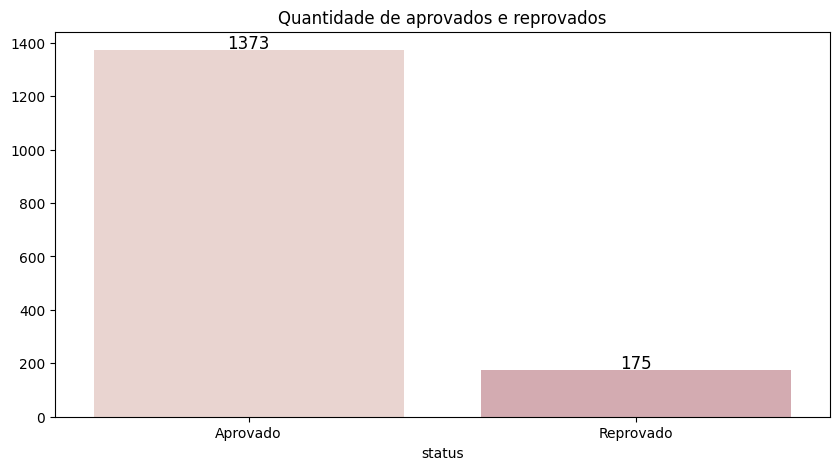

In [114]:
# Gráfico com as informações sobre quantidade de aprovados e de reprovados
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_credit_status['status'].value_counts().index, y=df_credit_status['status'].value_counts().values, palette=paleta)
plt.title('Quantidade de aprovados e reprovados')
plt.ylabel('')

# Adicionar números acima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points');

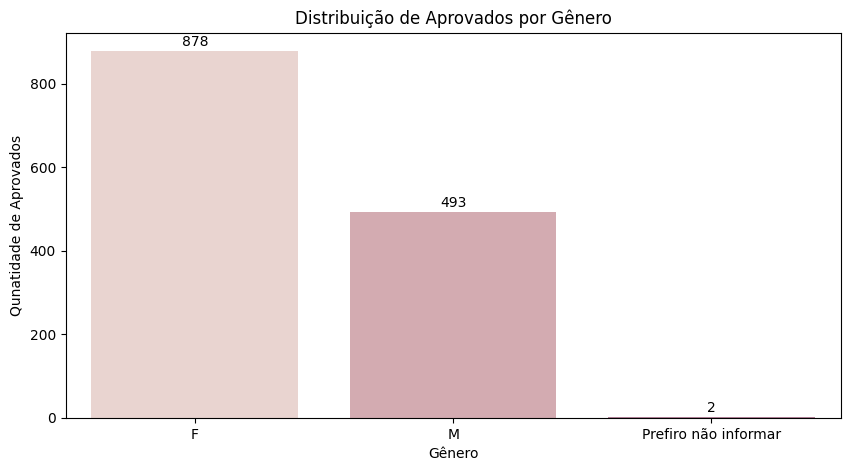

In [115]:
# Gráfico com a distribuição de aprovados por gênero

# Filtrar o DataFrame para apenas "Aprovado"
df_aprovados = df_credit_status[df_credit_status['status'] == 'Aprovado']

plt.figure(figsize=(10, 5))
ax = sns.countplot(x='genero', data=df_aprovados, palette=paleta)

# Adicionar rótulos e título
plt.xlabel('Gênero')
plt.ylabel('Qunatidade de Aprovados')
plt.title('Distribuição de Aprovados por Gênero')

# Adicionar os números um pouco acima das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height + 5), ha='center', va='bottom');


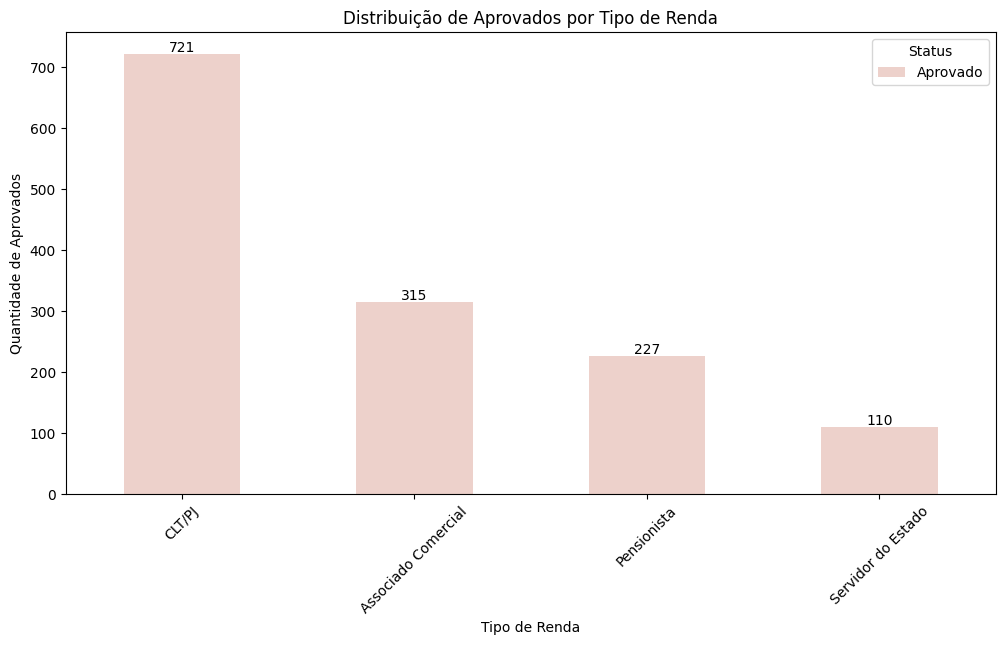

In [116]:
# Gráfico com a distribuição de aprovados por "tipo_renda"

# Criar tabela de contingência (crosstab) entre "tipo_renda" e "status" para os aprovados
crosstab = pd.crosstab(df_aprovados['tipo_renda'], df_aprovados['status'])

# Ordenar as colunas
crosstab = crosstab.sort_values(by='Aprovado', ascending=False)

ax = crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta)

# Adicionar os números
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height() + 10), ha='center', va='center')

plt.title('Distribuição de Aprovados por Tipo de Renda')
plt.xlabel('Tipo de Renda')
plt.ylabel('Quantidade de Aprovados')
plt.xticks(rotation=45)
plt.legend(title='Status');


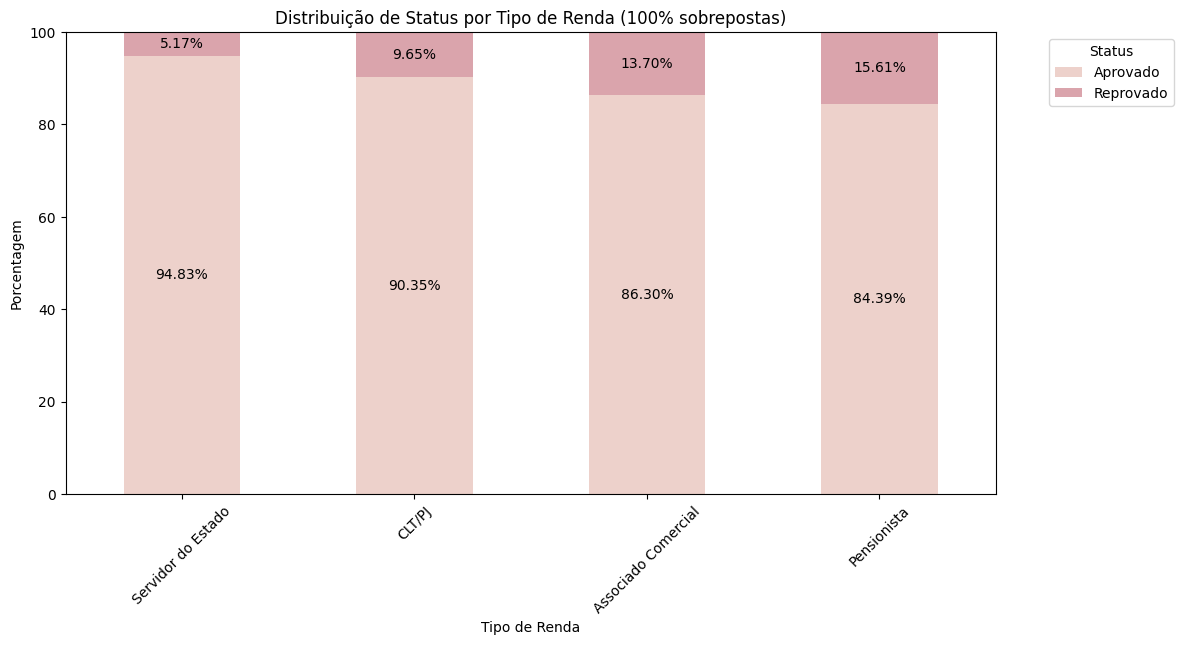

In [117]:
# Gráfico com a distribuição a partir do "tipo_renda" para ambos "status", de maneira percenual

# Criar tabela de contingência (crosstab) entre "tipo_renda" e "status"
crosstab1 = pd.crosstab(df_credit_status['tipo_renda'], df_credit_status['status'])

# Calcular as porcentagens em relação ao total
crosstab_percent = crosstab1.div(crosstab1.sum(axis=1), axis=0) * 100

# Calcular a porcentagem de aprovação
percent_aprovado = crosstab_percent['Aprovado']

# Ordenar as categorias pelo percentual de aprovação em ordem decrescente
categorias_ordenadas = percent_aprovado.sort_values(ascending=False).index

# Gráfico de barras empilhadas 100% sobrepostas
ax = crosstab_percent.loc[categorias_ordenadas].plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta)

# Adicionar os números no centro das barras com a porcentagem
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height/2), ha='center', va='center')

plt.title('Distribuição de Status por Tipo de Renda (100% sobrepostas)')
plt.xlabel('Tipo de Renda')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)
ax.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100);


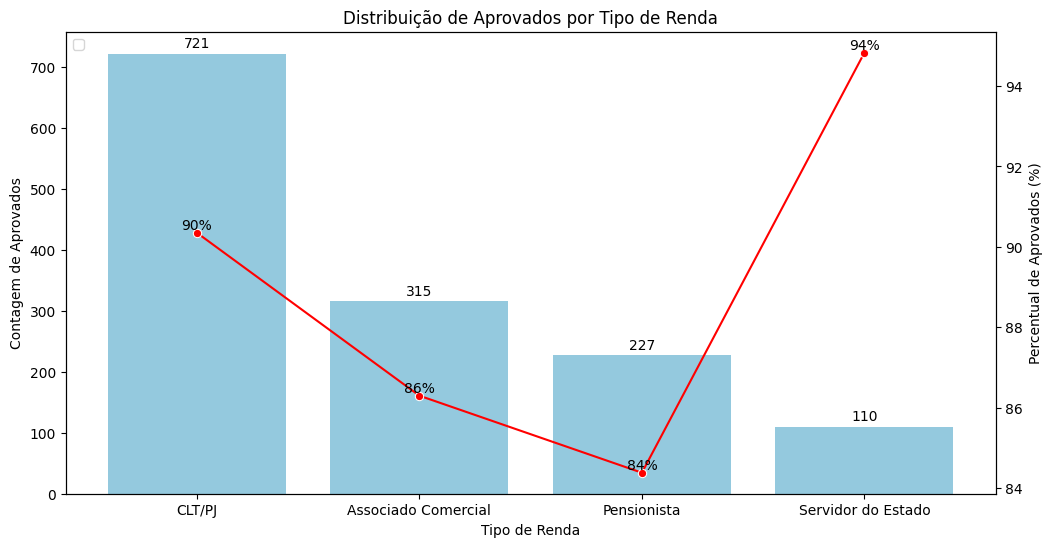

In [118]:
# Criar a tabela de contingência (crosstab)
crosstab = pd.crosstab(df_credit_status['tipo_renda'], df_credit_status['status'])

# Ordenar as colunas
crosstab = crosstab.sort_values(by='Aprovado', ascending=False)

# Calcular os percentuais
percentuais = crosstab['Aprovado'] / crosstab.sum(axis=1) * 100

# Criar uma figura
plt.figure(figsize=(12, 6))

# Criar o gráfico de barras
ax1 = sns.barplot(x=crosstab.index, y='Aprovado', data=crosstab, color='skyblue')
ax1.set_ylabel('Contagem de Aprovados')
ax1.set_xlabel('Tipo de Renda')

# Adicionar rótulos de contagem
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height + 5), ha='center', va='bottom')

# Criar o eixo secundário para o gráfico de linhas
ax2 = ax1.twinx()
ax2 = sns.lineplot(x=percentuais.index, y=percentuais.values, color='red', marker='o', sort=False)

# Adicionar rótulos no gráfico de linhas
for i, txt in enumerate(percentuais.values):
    ax2.annotate(f'{int(txt)}%', (percentuais.index[i], txt), ha='center', va='bottom')

# Adicionar título
plt.title('Distribuição de Aprovados por Tipo de Renda')

# Adicionar legenda
ax1.set_ylabel('Contagem de Aprovados')
ax2.set_ylabel('Percentual de Aprovados (%)')

# Ajustar a posição da legenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=2)

# Rotacionar rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

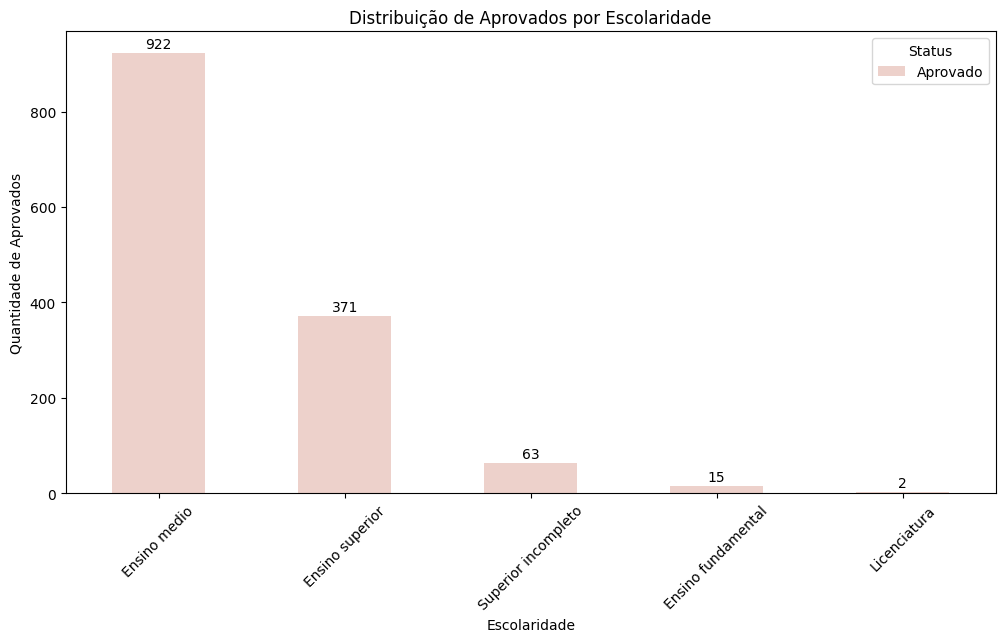

In [119]:
# Gráfico com a distribuição de aprovados por "escolaridade"

# Criar tabela de contingência (crosstab) entre "escolaridade" e "status" para os aprovados

crosstab2 = pd.crosstab(df_aprovados['escolaridade'], df_aprovados['status'])

# Ordenar as colunas

crosstab2 = crosstab2.sort_values(by='Aprovado', ascending=False)

# Gráfico de barras

ax = crosstab2.plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height + 5), ha='center', va='bottom')

plt.title('Distribuição de Aprovados por Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Quantidade de Aprovados')
plt.xticks(rotation=45)
plt.legend(title='Status');

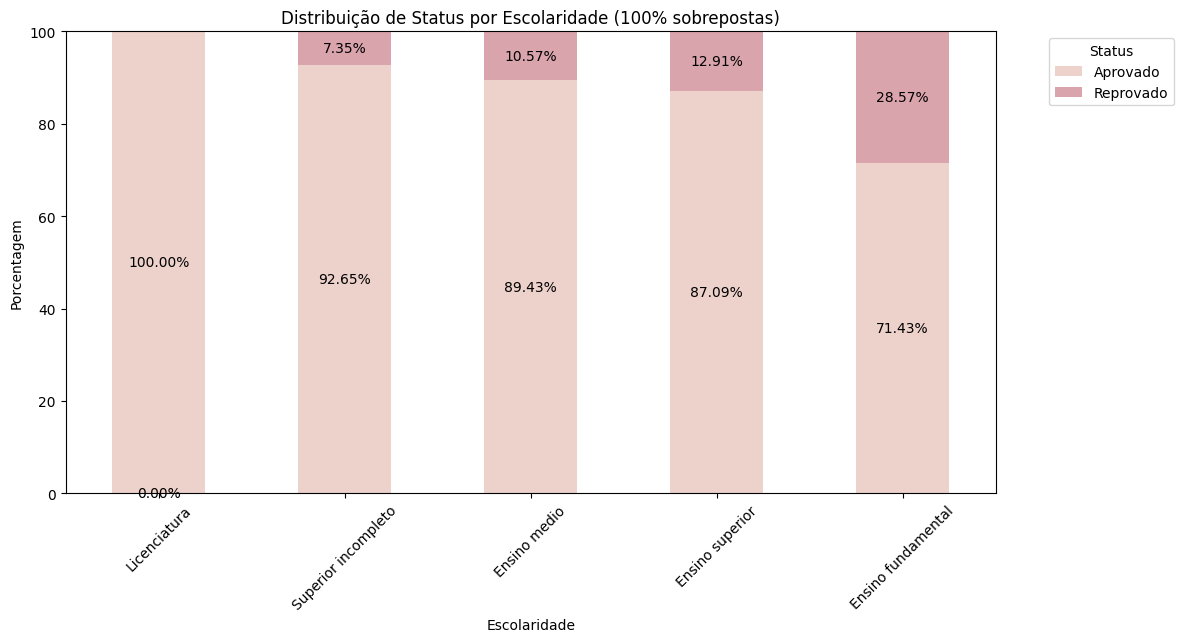

In [120]:
# Gráfico com a distribuição a partir da "escolaridade" para ambos "status", de maneira percenual

# Criar tabela de contingência (crosstab) entre "escolaridade" e "status"
crosstab3 = pd.crosstab(df_credit_status['escolaridade'], df_credit_status['status'])

# Calcular as porcentagens em relação ao total
crosstab_percent = crosstab3.div(crosstab3.sum(axis=1), axis=0) * 100

# Calcular a porcentagem de aprovação
percent_aprovado = crosstab_percent['Aprovado']

# Ordenar as categorias pelo percentual de aprovação em ordem decrescente
categorias_ordenadas = percent_aprovado.sort_values(ascending=False).index

# Gráfico de barras empilhadas 100% sobrepostas
ax = crosstab_percent.loc[categorias_ordenadas].plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta)

# Adicione os números no centro das barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.title('Distribuição de Status por Escolaridade (100% sobrepostas)')
plt.xlabel('Escolaridade')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)

ax.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100);


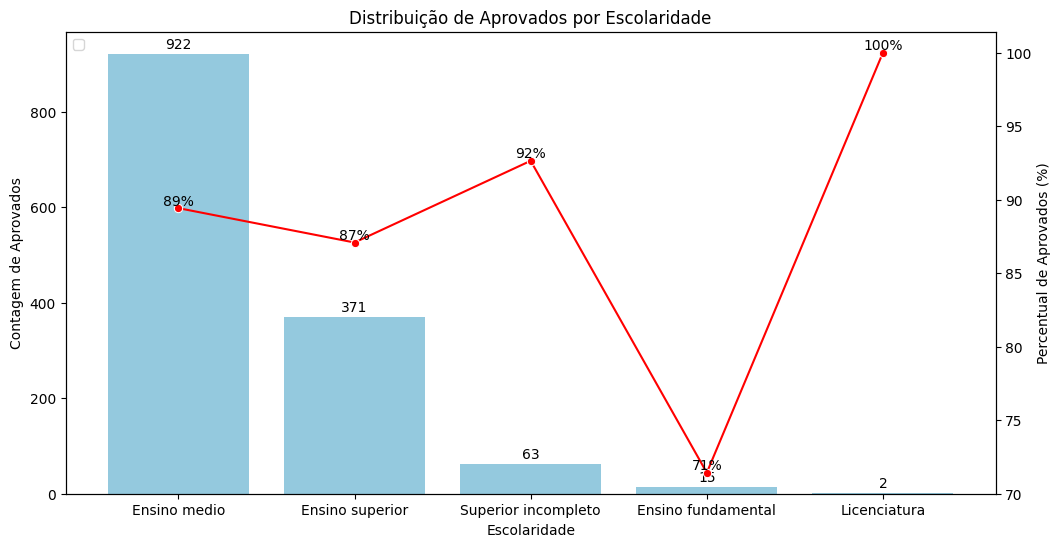

In [121]:
# Criar a tabela de contingência (crosstab)
crosstab = pd.crosstab(df_credit_status['escolaridade'], df_credit_status['status'])

# Ordenar as colunas
crosstab = crosstab.sort_values(by='Aprovado', ascending=False)

# Calcular os percentuais
percentuais = crosstab['Aprovado'] / crosstab.sum(axis=1) * 100

# Criar uma figura
plt.figure(figsize=(12, 6))

# Criar o gráfico de barras
ax1 = sns.barplot(x=crosstab.index, y='Aprovado', data=crosstab, color='skyblue')
ax1.set_ylabel('Contagem de Aprovados')
ax1.set_xlabel('Escolaridade')

# Adicionar rótulos de contagem
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height + 5), ha='center', va='bottom')

# Criar o eixo secundário para o gráfico de linhas
ax2 = ax1.twinx()
ax2 = sns.lineplot(x=percentuais.index, y=percentuais.values, color='red', marker='o', sort=False)

# Adicionar rótulos no gráfico de linhas
for i, txt in enumerate(percentuais.values):
    ax2.annotate(f'{int(txt)}%', (percentuais.index[i], txt), ha='center', va='bottom')

# Adicionar título
plt.title('Distribuição de Aprovados por Escolaridade')

# Adicionar legenda
ax1.set_ylabel('Contagem de Aprovados')
ax2.set_ylabel('Percentual de Aprovados (%)')

# Ajustar a posição da legenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=2)

# Rotacionar rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

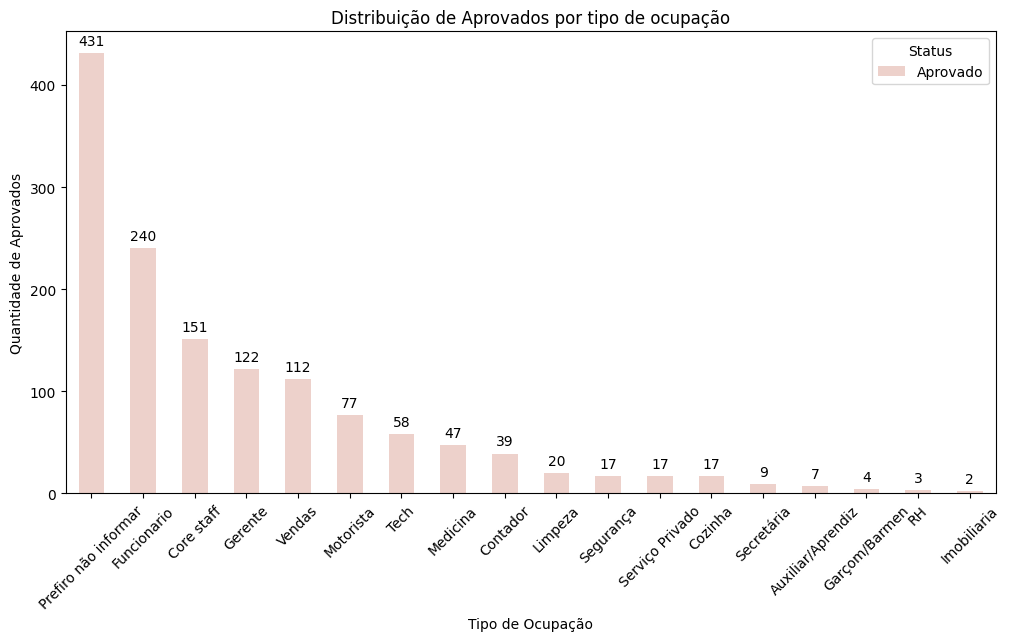

In [122]:
# Gráfico com a distribuição de aprovados por "tipo_ocupação"

# Criar tabela de contingência (crosstab) entre "tipo_ocupaçao" e "status" para os aprovados

crosstab4 = pd.crosstab(df_aprovados['tipo_ocupação'], df_aprovados['status'])

# Ordenar as colunas

crosstab4 = crosstab4.sort_values(by='Aprovado', ascending=False)

# Gráfico de barras

ax = crosstab4.plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height + 5), ha='center', va='bottom')

plt.title('Distribuição de Aprovados por tipo de ocupação')
plt.xlabel('Tipo de Ocupação')
plt.ylabel('Quantidade de Aprovados')
plt.xticks(rotation=45)
plt.legend(title='Status');

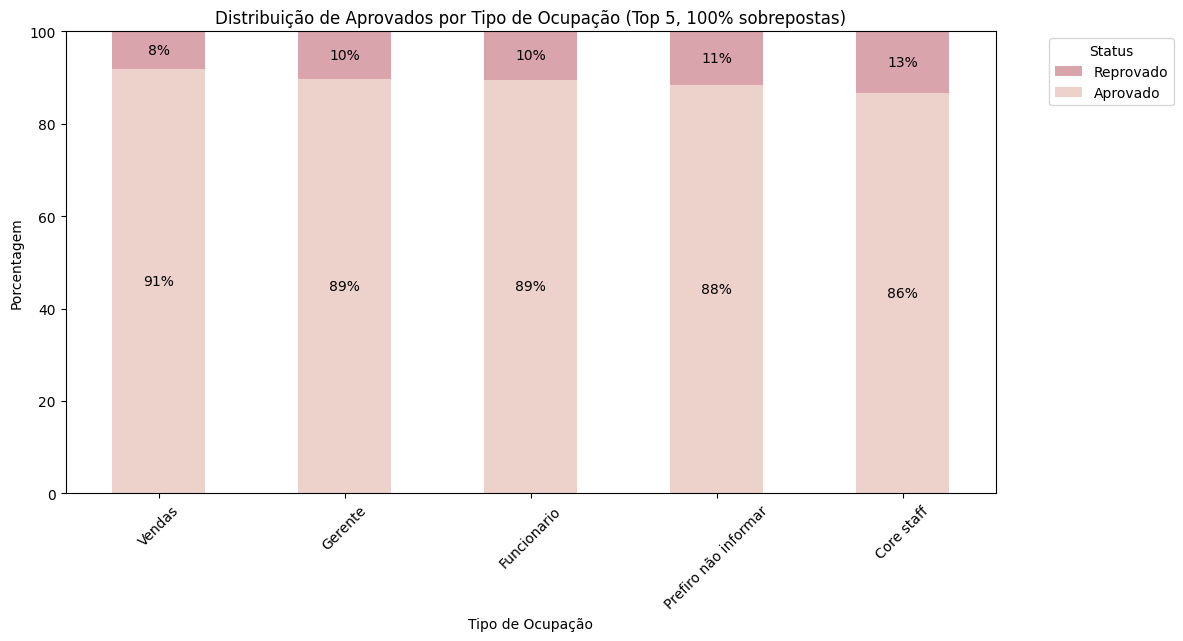

In [123]:
# Tabela de contingência (crosstab) entre "tipo_ocupação" e "status"
crosstab5 = pd.crosstab(df_credit_status['tipo_ocupação'], df_credit_status['status'])

# Ordene as colunas (barras) do DataFrame com base na contagem de "Aprovados"
crosstab5 = crosstab5.reindex(crosstab5.sum(axis=1).sort_values(ascending=False).index)

# Selecionar apenas os top 5 valores
crosstab_top5 = crosstab5.head(5)

# Calcular a porcentagem em relação ao total para o gráfico 100% empilhado
crosstab_percent = crosstab_top5.div(crosstab_top5.sum(axis=1), axis=0) * 100

# Calcular a porcentagem de aprovação
percent_aprovado = crosstab_percent['Aprovado']

# Ordenar as categorias pelo percentual de aprovação em ordem decrescente
categorias_ordenadas = percent_aprovado.sort_values(ascending=False).index

# Criar um gráfico de barras empilhadas 100% sobrepostas com a paleta de cores definida
ax = crosstab_percent.loc[categorias_ordenadas].plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta)

# Adicionar os números no centro das barras
for i in ax.containers:
    ax.bar_label(i, label_type='center', fontsize=10, color='black', labels=[f'{int(v)}%' for v in i.datavalues])

# Personalize o gráfico
plt.title('Distribuição de Aprovados por Tipo de Ocupação (Top 5, 100% sobrepostas)')
plt.xlabel('Tipo de Ocupação')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)
plt.ylim(0, 100)

# Colocar a caixa de legenda fora do gráfico
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Inverter a ordem das categorias na legenda (inverte a ordem dos valores)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Status', bbox_to_anchor=(1.05, 1), loc='upper left');

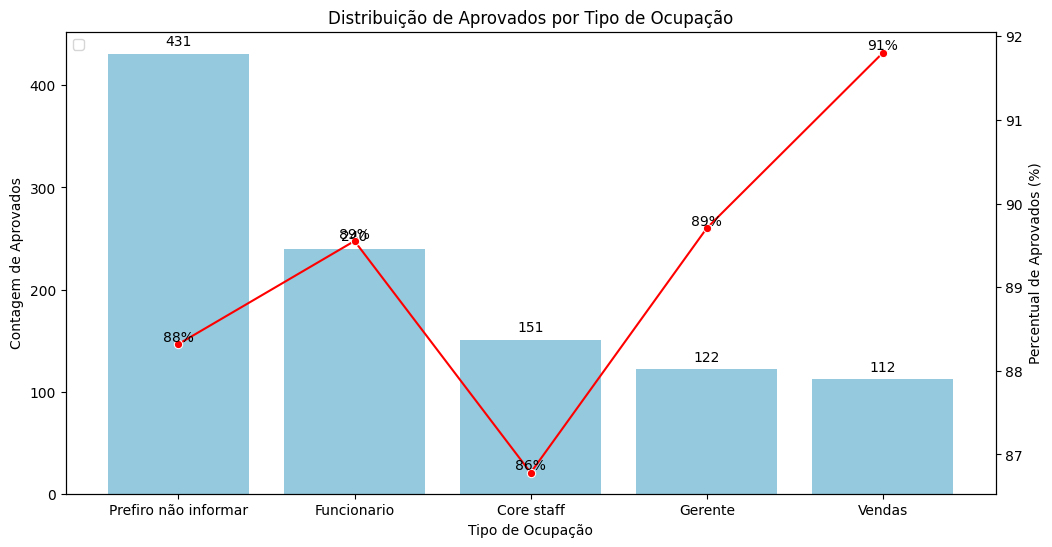

In [124]:
# Criar a tabela de contingência (crosstab)
crosstab = pd.crosstab(df_credit_status['tipo_ocupação'], df_credit_status['status'])

# Ordenar as colunas
crosstab = crosstab.sort_values(by='Aprovado', ascending=False)

# Calcular os percentuais
percentuais = crosstab_top5['Aprovado'] / crosstab_top5.sum(axis=1) * 100

# Criar uma figura
plt.figure(figsize=(12, 6))

# Criar o gráfico de barras
ax1 = sns.barplot(x=crosstab_top5.index, y='Aprovado', data=crosstab_top5, color='skyblue')
ax1.set_ylabel('Contagem de Aprovados')
ax1.set_xlabel('Tipo de Ocupação')

# Adicionar rótulos de contagem
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height + 5), ha='center', va='bottom')

# Criar o eixo secundário para o gráfico de linhas
ax2 = ax1.twinx()
ax2 = sns.lineplot(x=percentuais.index, y=percentuais.values, color='red', marker='o', sort=False)

# Adicionar rótulos no gráfico de linhas
for i, txt in enumerate(percentuais.values):
    ax2.annotate(f'{int(txt)}%', (percentuais.index[i], txt), ha='center', va='bottom')

# Adicionar título
plt.title('Distribuição de Aprovados por Tipo de Ocupação')

# Adicionar legenda
ax1.set_ylabel('Contagem de Aprovados')
ax2.set_ylabel('Percentual de Aprovados (%)')

# Ajustar a posição da legenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=2)

# Rotacionar rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

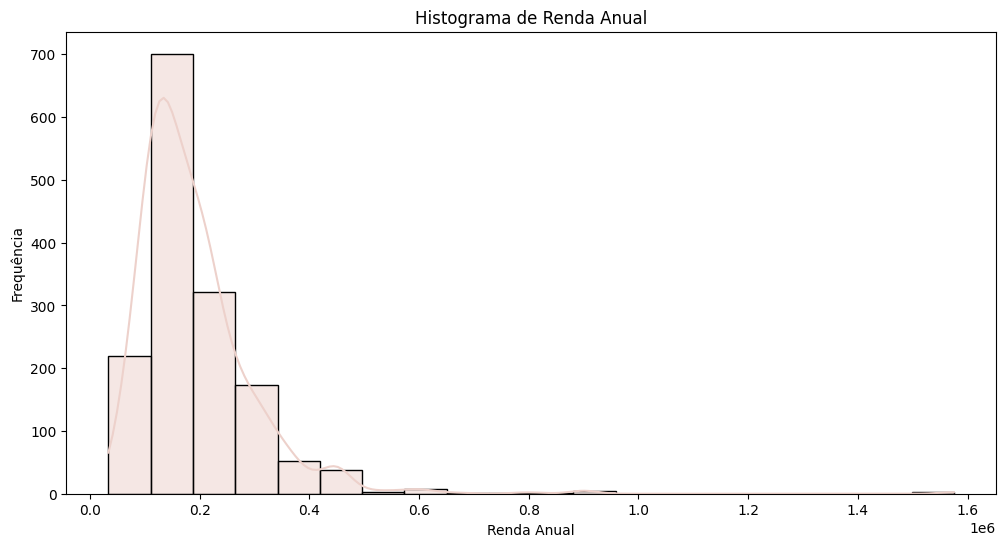

In [125]:
# A paleta de cores do seaborn por ser RGB estava dando erro, entao pesquisei qual era a cor e coloquei o codigo
paleta_rosa_claro = ['#EDD1CB']

# Crie o histograma usando a paleta personalizada
sns.set_palette(sns.color_palette(paleta_rosa_claro))
plt.figure(figsize=(12, 6))
sns.histplot(df_credit_status['renda_anual'], bins=20, kde=True)
plt.xlabel('Renda Anual')
plt.ylabel('Frequência')
plt.title('Histograma de Renda Anual');

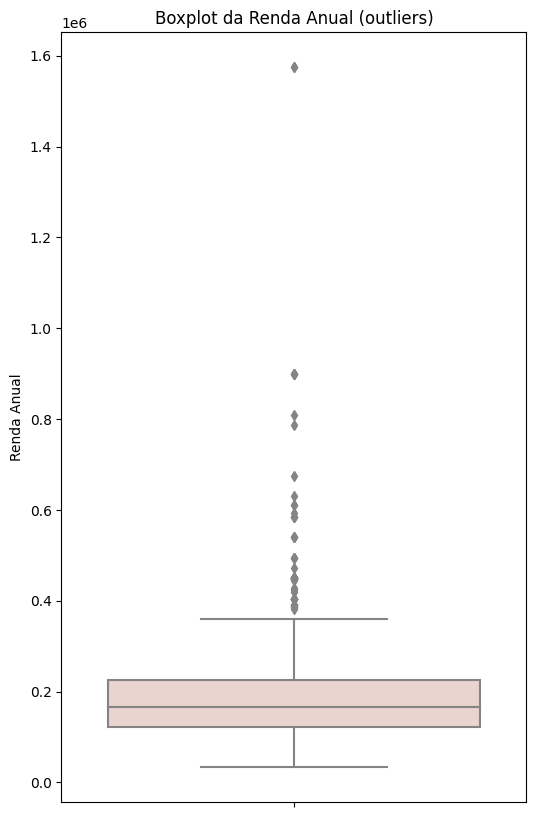

In [126]:
plt.figure(figsize=(6, 10))  # Invertendo a largura e a altura para criar um boxplot vertical
sns.boxplot(y=df_credit_status['renda_anual'], color='#EDD1CB', orient='v') #precisou ser cod da cor porque a paleta RGB estava dando erro
plt.ylabel('Renda Anual')
plt.title('Boxplot da Renda Anual (outliers)');


**Modelagem**
- Selecionar modelos a serem utilizados
- Explicar potenciais benefícios
- Mostrar principais métricas
- Conclusões iniciais

#Processo de modelagem dos dados.

O processo consiste em:

- 0) Fazer todo o processo de limpeza e avaliação da base, EDA, etc., etc.


- 1) Importar a **classe do algoritmo que se deseja treinar**
    - Usaremos quase sempre a biblioteca [scikit-learn](https://scikit-learn.org/stable/)
    
  
- 2) Instanciar a classe do algoritmo, **escolhendo os hiperparâmetros desejados**
    - Para a primeira versão do modelo, pode ser uma boa escolha utilizar os parâmetros default;
    - Veremos mais pra frente como escolher os parâmetros adequadamente;
    
   
- 3) Separe os dados em **dados de treino** e **dados de teste**.
    - Em alguns casos, pode ser interessante criar também um conjunto de **dados de validação**
    - Para fazer a separação, usamos o [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    
    
- 4) Treine o modelo, usando **os dados de treino**


- 5) Use o modelo treinado para **fazer previsões** usando os **dados de teste** (ou **de validação**)


- 6) **Avalie a performance do modelo com base nas previsões acima**


- 7) Se necessário, reinicie o ciclo!


- 8) Quando o modelo estiver suficientemente bom, faça o **deploy**

#0 - Importando e instalando as bibliotecas

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import re
from seaborn.widgets import cubehelix_palette
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV


In [128]:
#Paleta de cores escolhida
paleta = sns.cubehelix_palette()

#1 - Processando os dados

In [129]:
#Importando dados feito o tratamento de nulos, inconsistência de dados, união das bases e mudança de nome.
bd_data_clean = './Credit_card_clean.csv'

df = pd.read_csv(bd_data_clean)

In [130]:
#Observando as primeiras linhas dos dados
df.head().T

,0,1,2,3,4
id,5008827,5009744,5009746,5009749,5009752
genero,M,F,F,F,F
carro,Y,Y,Y,Y,Y
bens_propriedade,Y,N,N,N,N
filhos,0,0,0,0,0
renda_anual,180000.0,315000.0,315000.0,172243.04,315000.0
tipo_renda,Pensionista,Associado Comercial,Associado Comercial,Associado Comercial,Associado Comercial
escolaridade,Ensino superior,Ensino superior,Ensino superior,Ensino superior,Ensino superior
estado_civil,Casado,Casado,Casado,Casado,Casado
estilo_vida,Casa/Apartamento,Casa/Apartamento,Casa/Apartamento,Casa/Apartamento,Casa/Apartamento


In [131]:
# Algumas métricas estatísticas.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1541.0,5.078979e+06,41671.365842,5008827.0,5045113.0,5078924.0,5115671.0,5150412.0
filhos,1541.0,4.133679e-01,0.777811,0.0,0.0,0.0,1.0,14.0
renda_anual,1541.0,1.908141e+05,112153.974398,33750.0,121500.0,171000.0,225000.0,1575000.0
contar_aniverisario,1519.0,-1.604791e+04,4228.635700,-24946.0,-19561.5,-15702.0,-12417.5,-7705.0
desempregado,1541.0,5.940589e+04,137847.216798,-14887.0,-3173.0,-1563.0,-431.0,365243.0
celular,1541.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
telefone_comercial,1541.0,2.083063e-01,0.406229,0.0,0.0,0.0,0.0,1.0
telefone,1541.0,3.082414e-01,0.461917,0.0,0.0,0.0,1.0,1.0
email_id,1541.0,9.214796e-02,0.289329,0.0,0.0,0.0,0.0,1.0
tamanho_familia,1541.0,2.162232e+00,0.948492,1.0,2.0,2.0,3.0,15.0


In [132]:
# Observando os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1541 non-null   int64  
 1   genero               1541 non-null   object 
 2   carro                1541 non-null   object 
 3   bens_propriedade     1541 non-null   object 
 4   filhos               1541 non-null   int64  
 5   renda_anual          1541 non-null   float64
 6   tipo_renda           1541 non-null   object 
 7   escolaridade         1541 non-null   object 
 8   estado_civil         1541 non-null   object 
 9   estilo_vida          1541 non-null   object 
 10  contar_aniverisario  1519 non-null   float64
 11  desempregado         1541 non-null   int64  
 12  celular              1541 non-null   int64  
 13  telefone_comercial   1541 non-null   int64  
 14  telefone             1541 non-null   int64  
 15  email_id             1541 non-null   i

#2 - Tratamento para usar os modelos de Machine Learning

In [133]:
# Definindo a media para aplicar nos nulos na coluna "contar_aniversario"
cols_media = ['contar_aniverisario']
fill_media = SimpleImputer(missing_values=np.nan, strategy='mean')
fill_media.fit(df[cols_media])
df[cols_media] = fill_media.transform(df[cols_media])

In [134]:
# contar_aniverisario tranformando em idade e excluindo coluna
df["idade"] = df["contar_aniverisario"].apply(lambda x: abs(int(x))/365)
df = df.drop("contar_aniverisario", axis=1)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1541 non-null   int64  
 1   genero              1541 non-null   object 
 2   carro               1541 non-null   object 
 3   bens_propriedade    1541 non-null   object 
 4   filhos              1541 non-null   int64  
 5   renda_anual         1541 non-null   float64
 6   tipo_renda          1541 non-null   object 
 7   escolaridade        1541 non-null   object 
 8   estado_civil        1541 non-null   object 
 9   estilo_vida         1541 non-null   object 
 10  desempregado        1541 non-null   int64  
 11  celular             1541 non-null   int64  
 12  telefone_comercial  1541 non-null   int64  
 13  telefone            1541 non-null   int64  
 14  email_id            1541 non-null   int64  
 15  tipo_ocupação       1541 non-null   object 
 16  tamanh

## Transforme as colunas categóricas

 Temos as seguintes colunas categóricas:

 genero                 
 carro               
 bens_propriedade     
 tipo_renda          
 escolaridade          
 estado_civil         
 estilo_vida         
 tipo_ocupação


 Escolhemos tratar as colunas genero, carro e bens_propriedade com Label e as colunas escolaridade, estado_civil, estilo_vida, tipo_ocupação, tipo_renda com Dummies.

 Nas colunas com tratamento tipo Dummies existiam varias opções dentro da mesma coluna e com esse tratamento dividiu as colunas contendo 0 para o caso de não condizer com a informação e 1 para o caso de condizer a informação.

 Nos tratamentos com Label foi trocada a informação para as seguintes informações:

 Y = 1;
 N = 0;
 M = 1;
 F = 0;


In [136]:
colunas_label_encoder = ['genero', 'carro', 'bens_propriedade'] #Lista de colunas que serão codificadas com Label Encoder

df_tratado = df.copy()

#Tratamento com Label Encoder
label_encoder = LabelEncoder()
for coluna in colunas_label_encoder:
    df_tratado[coluna] = label_encoder.fit_transform(df_tratado[coluna])

 #Tratamento com Dummies/One Hot Encoding
df_tratado = pd.get_dummies(df_tratado, prefix_sep='_',columns=['tipo_renda',
                                                                'escolaridade',
                                                                'estado_civil',
                                                                'estilo_vida',
                                                                'tipo_ocupação'])
df_tratado.head().T

,0,1,2,3,4
id,5008827,5009744,5009746,5009749,5009752
genero,1,0,0,0,0
carro,1,1,1,1,1
bens_propriedade,1,0,0,0,0
filhos,0,0,0,0,0
renda_anual,180000.0,315000.0,315000.0,172243.04,315000.0
desempregado,365243,-586,-586,-586,-586
celular,1,1,1,1,1
telefone_comercial,0,1,1,1,1
telefone,0,1,1,1,1


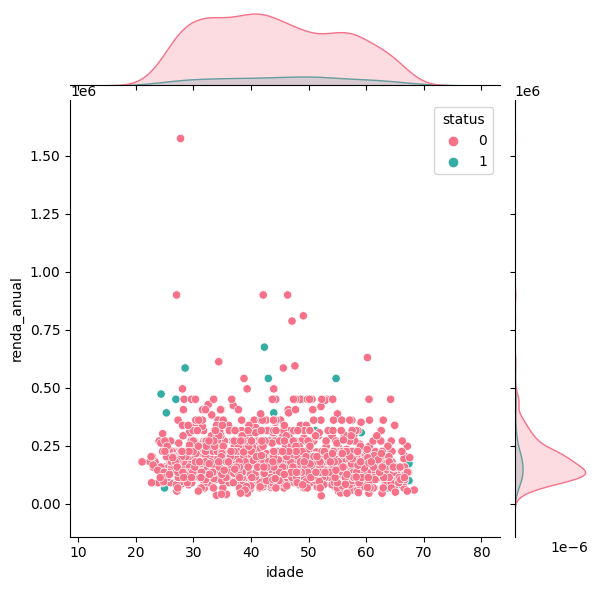

In [137]:
sns.jointplot(data=df, x='idade', y='renda_anual', hue='status')

C:\Users\desir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


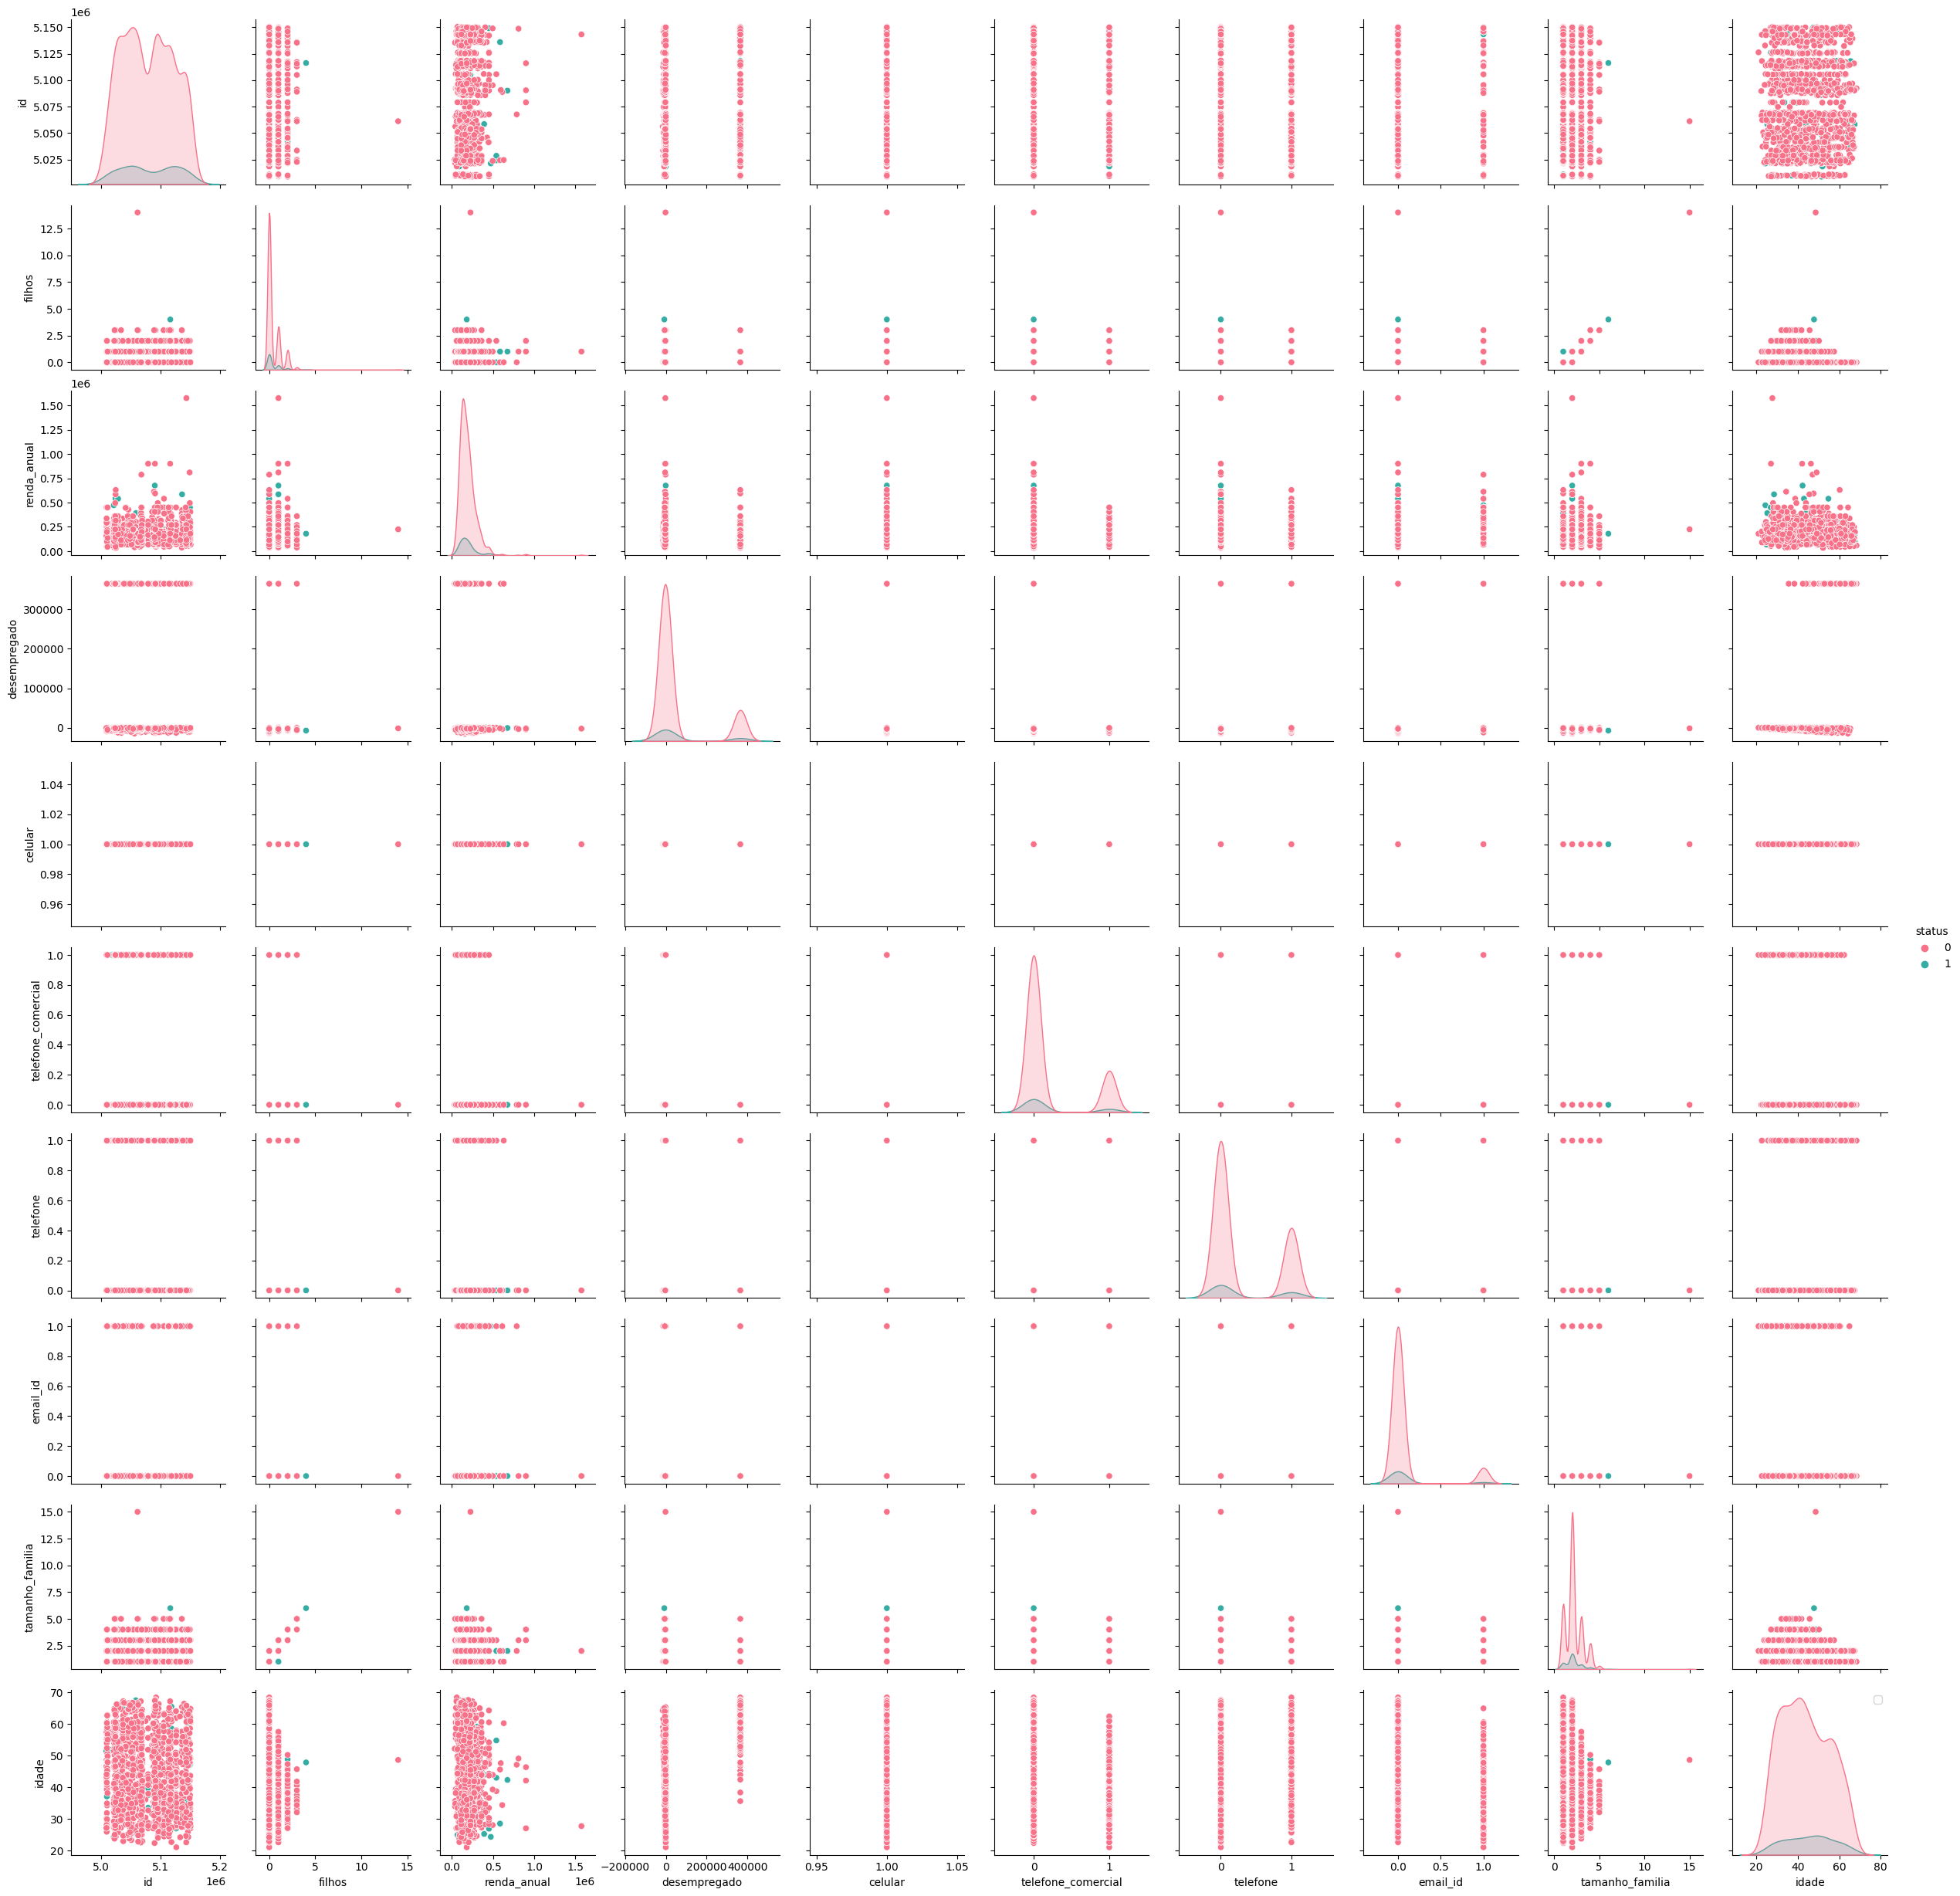

In [139]:
#Gráfico de matriz de dispersão (pair plot)
sns.pairplot(df, hue='status')
plt.legend()

#3 - Separação e normalização dos dados

In [140]:
# Remova a coluna status dos dados, extraindo as features na variável X
X = df_tratado.drop(['status'], axis = 1)
y_status = df['status']

In [141]:
#Separando em train e test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, # Conjunto de features
                                                    y_status, # Conjunto alvo
                                                    test_size=0.3, # Dividir o conjunto em x% para teste (se for float), x elementos para teste se inteiro
                                                    random_state=42, # Garantir a reprodutibilidade
                                                    stratify = y_status) # Garantir a estratificação balanceada (manter o desbalanceamento do dataset)

In [142]:
#confirmando o mantimento da proporcionalidade
print(f" Proporção y_status: \n{y_status.value_counts(normalize=True)}")
print(f" Proporção y_train: \n{y_train.value_counts(normalize=True)}")
print(f" Proporção y_test: \n{y_test.value_counts(normalize=True)}")

 Proporção y_status: 
status
0    0.889682
1    0.110318
Name: proportion, dtype: float64
 Proporção y_train: 
status
0    0.88961
1    0.11039
Name: proportion, dtype: float64
 Proporção y_test: 
status
0    0.889849
1    0.110151
Name: proportion, dtype: float64


In [143]:
# Padronização/Normalizando dos dados utilizando o StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train) #Normalização nos dados de treino

In [144]:
X_test_std = scaler.transform(X_test) #Normalização nos dados de teste

In [145]:
print('Dados de treino->', X_train.shape[0])
print('Dados de teste ->', X_test.shape[0])

Dados de treino-> 1078
Dados de teste -> 463


In [146]:
def treinamento_modelo(estimador, X_train, X_test, y_train):
    """
    Treina um modelo com os dados de treinamento e faz previsões com os dados de teste.

    Args:
        estimador: Um modelo de aprendizado de máquina (classificador/regressor).
        X_train: Dados de treinamento.
        X_test: Dados de teste.
        y_train: Rótulos de treinamento.

    Returns:
        y_pred: Rótulos previstos pelo modelo.
    """
    estimador.fit(X_train, y_train)
    y_pred = estimador.predict(X_test)

    return y_pred


In [147]:
def analise_relatorio_matriz_confusao(lista_modelos, X_train, X_test, y_train, y_test):
    """
    Esta função treina modelos, gera relatórios de classificação e plota matrizes de confusão para cada modelo.

    Args:
        lista_modelos: Uma lista de dicionários com informações sobre os modelos.
        X_train: Dados de treinamento.
        X_test: Dados de teste.
        y_train: Rótulos de treinamento.
        y_test: Rótulos de teste.
    """

    print(f"\n\n\n **** RELATÓRIO DOS MODELOS + MATRIZ DE CONFUSÃO ****\n")

    for mdl in lista_modelos:
        nome_do_modelo = mdl["nome_do_modelo"]
        estimador = mdl["estimador"]

        y_pred = treinamento_modelo(estimador, X_train, X_test, y_train)

        report = classification_report(y_test, y_pred) #Geração dos relatórios de classificação
        print(f"Relatório de classificação para {nome_do_modelo}:\n{report}\n {'='*60}")

        #Calculando e plotando a matriz de confusão
        cm = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix(conf_mat=cm)
        plt.title(f"Matriz de Confusão para {nome_do_modelo}")
        plt.show()

In [148]:
def analise_curva_ROC_AUC(lista_modelos, X_train, X_test, y_train, y_test):
    """
    Esta função treina vários modelos e avalia seu desempenho usando métricas como acurácia, precisão, revocação e F1-score.
    Também plota a curva ROC-AUC e a matriz de confusão para cada modelo.

    Args:
        lista_modelos: Uma lista de dicionários contendo informações sobre os modelos a serem treinados.
        X_train: Dados de treinamento.
        X_test: Dados de teste.
        y_train: Rótulos de treinamento.
        y_test: Rótulos de teste.

    Returns:
        dict: Um dicionário com as métricas de desempenho de cada modelo.
    """

    print(f"\n\n\n **** RESULTADO DOS MODELOS + CURVA ROC-AUC ****\n")

    resposta = {}

    for mdl in lista_modelos:
        nome_do_modelo = mdl["nome_do_modelo"]
        estimador = mdl.get('estimador')

        y_pred = treinamento_modelo(estimador, X_train, X_test, y_train)

        fpr, tpr, thresholds = metrics.roc_curve(y_test, estimador.predict_proba(X_test)[:,1]) #Calculo da curva ROC

        # Cálculo das métricas de desempenho
        model_name = mdl.get('nome_do_modelo')
        accuracy = metrics.accuracy_score(y_test, y_pred)
        auc = metrics.roc_auc_score(y_test, estimador.predict(X_test))
        precision = metrics.precision_score(y_test, y_pred, average='weighted')
        recall = metrics.recall_score(y_test, y_pred, average='weighted')
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

        plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (mdl.get('nome_do_modelo'), auc)) #Plotagem da curva ROC de cada modelo

        print(f"Modelo     : {nome_do_modelo}")
        print(f"Acurácia   : {accuracy:.5f}")
        print(f"Precisão   : {precision:.5f}")
        print(f"Revocação  : {recall:.5f}")
        print(f"F1 - Score : {f1_score:.5f}")
        print(f"ROC - AUC  : {auc:.5f}\n\n{'='*50}\n")

        resposta[mdl.get('nome_do_modelo')]  = {
            "Acurácia": accuracy,
            "Precisão": precision,
            "Revocação": recall,
            "f1_score": f1_score,
            "auc": auc,
        }

    #Plotagem da curva ROC geral
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Verdadeiro Positivo')
    plt.ylabel('Taxa de Falso Positivo')
    plt.title('CURVA ROC-AUC')
    plt.legend(loc="lower right")
    plt.show()

    return resposta


In [149]:
def dataframe_resposta(pipeline_resposta):
    """
    Cria um DataFrame a partir do resultado dos modelos contendo as métricas de desempenho de modelos.
    Args:
        pipeline_resposta: Um dicionário que contém métricas de desempenho para diferentes modelos.
    Returns:
        metricas_df: Um DataFrame que contém as métricas organizadas por modelo.
    """
    resp = []
    for modelo, modelo_metricas  in pipeline_resposta.items():
      metricas = []
      metricas.append(modelo)
      for metrica in modelo_metricas.values():
        metricas.append(metrica)
      resp.append(metricas)

    metricas_df = pd.DataFrame(resp, columns=['modelo'] + list(pipeline_resposta['Decision Tree'].keys()))
    return metricas_df

In [151]:
random_seed = 42 #garantir reprodutibilidade

#Lista de modelos utilizados para essa primeira análise
lista_modelos = [
  {
      "nome_do_modelo": "Decision Tree",
      "estimador": DecisionTreeClassifier(random_state=random_seed)
  },
  {
      "nome_do_modelo": "Random Forest",
      "estimador": RandomForestClassifier(random_state=random_seed)
  },
  {
      "nome_do_modelo": "AdaBoost",
      "estimador": AdaBoostClassifier(random_state=random_seed)
  },
  {
      "nome_do_modelo": "GradientBoosting",
      "estimador": GradientBoostingClassifier(random_state=random_seed)
  },
  {
      "nome_do_modelo": "XGBoost",
      "estimador": XGBClassifier(random_state=random_seed)
  },
  {
      "nome_do_modelo": "LightGBM",
      "estimador": lgb.LGBMClassifier(random_state=random_seed)
  },
]

#5 - Analisando os dados encontrados




 **** RELATÓRIO DOS MODELOS + MATRIZ DE CONFUSÃO ****

Relatório de classificação para Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       412
           1       0.42      0.51      0.46        51

    accuracy                           0.87       463
   macro avg       0.68      0.71      0.69       463
weighted avg       0.88      0.87      0.87       463



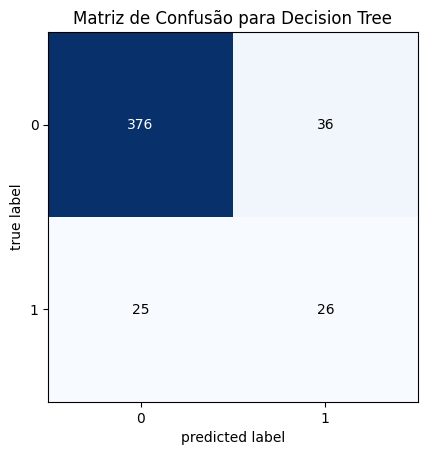

Relatório de classificação para Random Forest:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       412
           1       0.92      0.43      0.59        51

    accuracy                           0.93       463
   macro avg       0.93      0.71      0.78       463
weighted avg       0.93      0.93      0.92       463



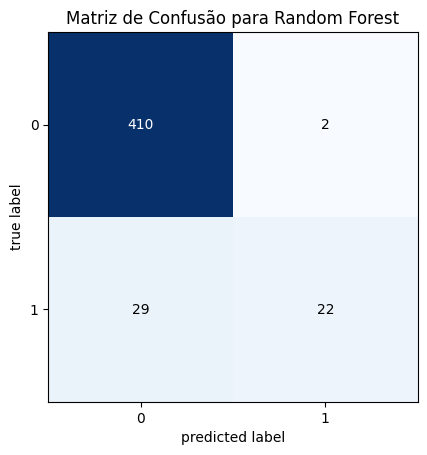

Relatório de classificação para AdaBoost:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       412
           1       0.75      0.06      0.11        51

    accuracy                           0.89       463
   macro avg       0.82      0.53      0.53       463
weighted avg       0.88      0.89      0.85       463



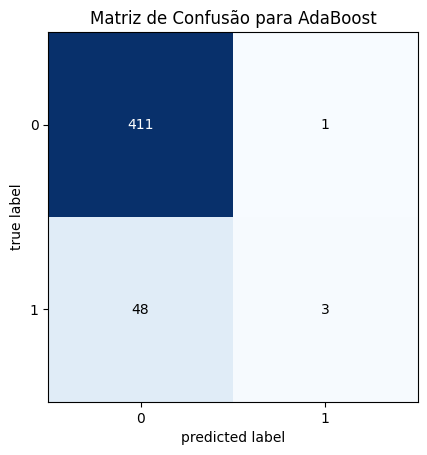

Relatório de classificação para GradientBoosting:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       412
           1       0.69      0.18      0.28        51

    accuracy                           0.90       463
   macro avg       0.80      0.58      0.61       463
weighted avg       0.88      0.90      0.87       463



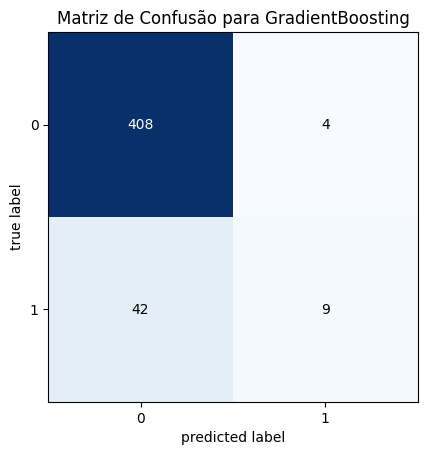

Relatório de classificação para XGBoost:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       412
           1       0.74      0.49      0.59        51

    accuracy                           0.92       463
   macro avg       0.84      0.73      0.77       463
weighted avg       0.92      0.92      0.92       463



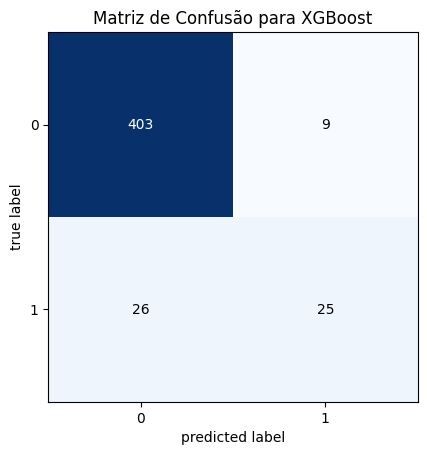

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 119, number of negative: 959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 1078, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110390 -> initscore=-2.086768
[LightGBM] [Info] Start training from score -2.086768
Relatório de classificação para LightGBM:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       412
           1       0.86      0.47      0.61        51

    accuracy                           0.93       463
   macro avg       0.90      0.73      0.79       463
weighted avg       0.93      0.93      0.92       463


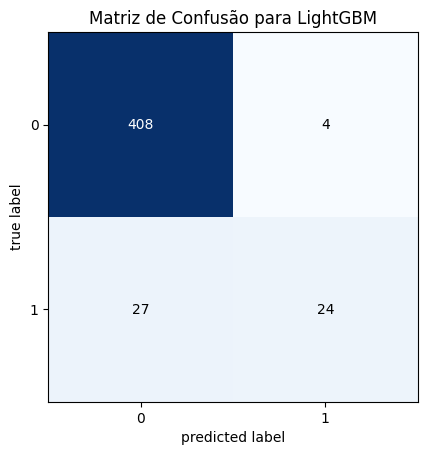

In [152]:
#usando a função analise_relatorio_matriz_confusao para observar os dados por meio da matriz confusão
analise_relatorio_matriz_confusao(lista_modelos, X_train, X_test, y_train, y_test)




 **** RESULTADO DOS MODELOS + CURVA ROC-AUC ****

Modelo     : Decision Tree
Acurácia   : 0.86825
Precisão   : 0.88056
Revocação  : 0.86825
F1 - Score : 0.87377
ROC - AUC  : 0.71121


Modelo     : Random Forest
Acurácia   : 0.93305
Precisão   : 0.93204
Revocação  : 0.93305
F1 - Score : 0.92206
ROC - AUC  : 0.71326


Modelo     : AdaBoost
Acurácia   : 0.89417
Precisão   : 0.87941
Revocação  : 0.89417
F1 - Score : 0.85180
ROC - AUC  : 0.52820


Modelo     : GradientBoosting
Acurácia   : 0.90065
Precisão   : 0.88305
Revocação  : 0.90065
F1 - Score : 0.87334
ROC - AUC  : 0.58338


Modelo     : XGBoost
Acurácia   : 0.92441
Precisão   : 0.91691
Revocação  : 0.92441
F1 - Score : 0.91761
ROC - AUC  : 0.73418


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 119, number of negative: 959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` 

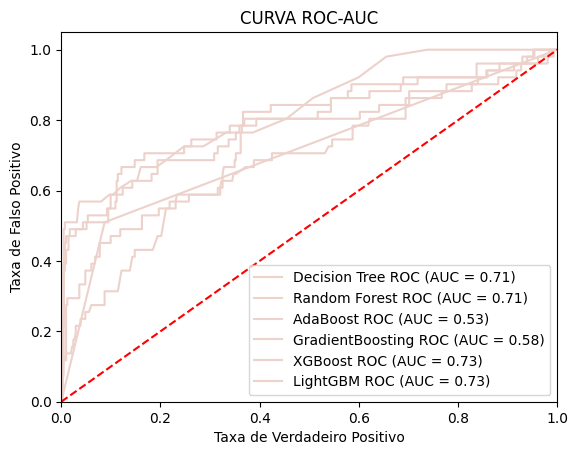

In [153]:
#usando a função nalise_curva_ROC_AUC para observar os dados por meio da curva ROC AUC
pipeline_resposta = analise_curva_ROC_AUC(lista_modelos, X_train, X_test, y_train, y_test)

Estes resultados indicam que o modelo "Random Forest" e "LightGBM" obtiveram as maiores acurácias (93,31%), com desempenho semelhante em termos de precisão, revocação e F1-Score. Além disso, ambos os modelos tiveram ROC-AUC significativamente melhores do que os outros modelos, indicando uma melhor capacidade de separar classes.

Por outro lado, o modelo "AdaBoost" teve o desempenho mais baixo em todas as métricas, com uma ROC-AUC de 0,52820, o que sugere que ele não é tão eficaz na classificação em comparação com os outros modelos. O modelo escolhido foi  o "LightGBM".

In [154]:
#Organização dos modelos e métricas
metricas_df=dataframe_resposta(pipeline_resposta)
metricas_df

,modelo,Acurácia,Precisão,Revocação,f1_score,auc
0,Decision Tree,0.868251,0.880564,0.868251,0.873772,0.711213
1,Random Forest,0.933045,0.932038,0.933045,0.922056,0.713259
2,AdaBoost,0.894168,0.879406,0.894168,0.851805,0.528198
3,GradientBoosting,0.900648,0.883055,0.900648,0.873343,0.583381
4,XGBoost,0.924406,0.916912,0.924406,0.917611,0.734176
5,LightGBM,0.933045,0.929032,0.933045,0.924208,0.730440


## Validação do modelo 

A partir dos resultados das métricas dos modelos de classificação testados, ficou decidido que o modelo a ser utilizado será o LightGBM, tendo em vista seu melhor desempenho na métrica de Revocação, seguida pelo F1-Score. A escolha da métrica se deu em decorrência de optarmos por uma maior abrangência de clientes para recebimento do crédito.

#### Cross-Validation (Validação Cruzada)

A fim de medir a generalização do modelo optado, utilizarmos a técnica de validação cruzada. Dessa forma, saberemos o quão preciso é o nosso modelo, ou seja o seu desempenho em um novo conjunto de dados

Utilizando o _cross_val_score_:

In [155]:
# Criando uma instância do modelo LightGBM

model_chosen = lgb.LGBMClassifier(random_state=random_seed)

In [156]:
# Lista de métricas a serem avaliadas durante a validação cruzada
metrics = ['accuracy', 'recall', 'precision', 'f1']

# Realização da validação cruzada usando o modelo LightGBM
rf_cross_val = cross_validate(
    model_chosen,
    X_train_std, 
    y_train,
    scoring=metrics, 
    cv=5 
)

[LightGBM] [Info] Number of positive: 95, number of negative: 767
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 884
[LightGBM] [Info] Number of data points in the train set: 862, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110209 -> initscore=-2.088610
[LightGBM] [Info] Start training from score -2.088610
[LightGBM] [Info] Number of positive: 95, number of negative: 767
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 878
[LightGBM] [Info] Number of data points in the train set: 862, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110209 -> initscore=-2.088610
[LightGBM] [Info] 

In [157]:
pd.DataFrame(rf_cross_val)

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.114563,0.018081,0.916667,0.333333,0.800000,0.470588
1,0.064162,0.007003,0.907407,0.333333,0.666667,0.444444
2,0.069868,0.007516,0.925926,0.458333,0.785714,0.578947
3,0.067603,0.008030,0.925581,0.391304,0.818182,0.529412
4,0.059615,0.008583,0.939535,0.625000,0.789474,0.697674


In [158]:
pd.DataFrame(rf_cross_val).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,5.0,0.075162,0.022362,0.059615,0.064162,0.067603,0.069868,0.114563
score_time,5.0,0.009842,0.004643,0.007003,0.007516,0.008030,0.008583,0.018081
test_accuracy,5.0,0.923023,0.011957,0.907407,0.916667,0.925581,0.925926,0.939535
test_recall,5.0,0.428261,0.121448,0.333333,0.333333,0.391304,0.458333,0.625000
test_precision,5.0,0.772007,0.060219,0.666667,0.785714,0.789474,0.800000,0.818182
test_f1,5.0,0.544213,0.100437,0.444444,0.470588,0.529412,0.578947,0.697674


Nota-se que nossos resultados foram bons, com a média da acurácia sendo 92% e a variância apenas 1%.

**Optimização de modelo(s)**

- Optimização dos hiperparâmetros, pelo menos um (1) modelo
- Demonstrar de forma clara quais os resultados obtidos

Agora, iremos verificar se com outras combinações de parâmetros é possível otimizar a performance do nosso modelo.

In [159]:
model_chosen.fit(X_train, y_train)
y_pred = model_chosen.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print(acc)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 119, number of negative: 959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 1078, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110390 -> initscore=-2.086768
[LightGBM] [Info] Start training from score -2.086768
0.9330453563714903


Vamos começar entendendo os principais parâmetros do modelo.

In [160]:
pprint("Parâmetros do LightGBM:")
pprint(model_chosen.get_params())

'Parâmetros do LightGBM:'
{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}


In [161]:
# Definindo o espaço de pesquisa para os hiperparâmetros escolhidos
params_grid = {
    'num_leaves': [20, 31, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5], 
}


Partimos, agora, para o treinamento do GridSearch com os hiperparâmetros escolhidos para otimização.

In [163]:
grid_search = GridSearchCV(
    estimator=model_chosen, 
    param_grid = params_grid,
    scoring='accuracy',
    cv=3, 
    verbose=2,
    n_jobs=-1
)

In [164]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 119, number of negative: 959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 1078, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110390 -> initscore=-2.086768
[LightGBM] [Info] Start training from score -2.086768
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'num_leaves': [20, 31, 40],
                         'reg_alpha': [0.0, 0.1, 0.5],
                         'reg_lambda': [0.0, 0.1, 0.5],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=2)

In [165]:
# Calculando a média dos resultados dos testes para todas as configurações de hiperparâmetros que foram experimentadas durante a pesquisa em grade 
print(grid_search.cv_results_['mean_test_score'].mean())

0.9060213789680645


Após a pesquisa em grade, vamos verificar o dicionário com os melhores valores de hiperparâmetros encontrados durante o processo de busca.

In [166]:
# Melhor parâmetro grid_search
grid_search.best_params_


{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'num_leaves': 40,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'subsample': 0.8}

Verificando e analisando os resultados da pesquisa em grade ao criar um DataFrame contendo os resultados da validação cruzada e, em seguida, calcular estatísticas descritivas para esses resultados, facilitando a análise do desempenho do modelo em diferentes configurações de hiperparâmetros.

In [167]:
cvs = pd.DataFrame(grid_search.cv_results_)

cvs.T

,0,1,2,3,4,5,6,7,8,9,...,719,720,721,722,723,724,725,726,727,728
mean_fit_time,0.616181,0.656004,0.547065,0.424791,0.425672,0.364989,0.351483,0.351859,0.381995,0.378606,...,0.767005,0.845633,0.817603,0.765736,0.688216,0.664961,0.628498,0.647875,0.639529,0.450088
std_fit_time,0.055142,0.067517,0.018502,0.013794,0.029918,0.020791,0.001842,0.00122,0.033877,0.003307,...,0.014629,0.026833,0.031325,0.012351,0.007792,0.009854,0.016565,0.008248,0.010607,0.091875
mean_score_time,0.005516,0.008012,0.006853,0.005848,0.003846,0.005176,0.003677,0.004019,0.004509,0.004174,...,0.008696,0.007356,0.006349,0.00518,0.005676,0.005683,0.00568,0.005688,0.00585,0.005299
std_score_time,0.001877,0.002127,0.002323,0.000241,0.000239,0.001322,0.000237,0.000827,0.000407,0.000239,...,0.00318,0.001249,0.000628,0.000943,0.000229,0.000946,0.000241,0.000616,0.000854,0.000416
param_colsample_bytree,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
param_learning_rate,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
param_num_leaves,20,20,20,20,20,20,20,20,20,20,...,40,40,40,40,40,40,40,40,40,40
param_reg_alpha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
param_reg_lambda,0.0,0.0,0.0,0.1,0.1,0.1,0.5,0.5,0.5,0.0,...,0.5,0.0,0.0,0.0,0.1,0.1,0.1,0.5,0.5,0.5
param_subsample,0.8,0.9,1.0,0.8,0.9,1.0,0.8,0.9,1.0,0.8,...,1.0,0.8,0.9,1.0,0.8,0.9,1.0,0.8,0.9,1.0


In [168]:
cvs.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_fit_time,729.0,0.896822,0.417469,0.351483,0.644986,0.812329,1.008504,3.991860
std_fit_time,729.0,0.050505,0.091373,0.000579,0.012872,0.028289,0.054458,1.213131
mean_score_time,729.0,0.006951,0.002401,0.003677,0.005680,0.006353,0.007518,0.027301
std_score_time,729.0,0.001493,0.002222,0.000002,0.000477,0.000943,0.001658,0.026985
split0_test_score,729.0,0.902218,0.009869,0.888889,0.888889,0.905556,0.911111,0.916667
split1_test_score,729.0,0.902003,0.011204,0.888579,0.891365,0.899721,0.908078,0.927577
split2_test_score,729.0,0.913844,0.018158,0.888579,0.888579,0.924791,0.927577,0.933148
mean_test_score,729.0,0.906021,0.012137,0.888683,0.889611,0.910949,0.915589,0.923014
std_test_score,729.0,0.006715,0.004732,0.000146,0.001247,0.006838,0.010711,0.017348
rank_test_score,729.0,330.851852,178.420066,1.000000,178.000000,361.000000,487.000000,697.000000


In [169]:
cvs.sort_values('rank_test_score').head().T

,473,472,471,195,197
mean_fit_time,0.980117,1.70948,3.137061,1.03277,1.044468
std_fit_time,0.058107,0.407238,0.524255,0.125233,0.021452
mean_score_time,0.007185,0.006516,0.006513,0.008863,0.008188
std_score_time,0.000855,0.000416,0.000821,0.003414,0.001024
param_colsample_bytree,0.9,0.9,0.9,0.8,0.8
param_learning_rate,0.1,0.1,0.1,0.1,0.1
param_num_leaves,40,40,40,31,31
param_reg_alpha,0.1,0.1,0.1,0.0,0.0
param_reg_lambda,0.1,0.1,0.1,0.5,0.5
param_subsample,1.0,0.9,0.8,0.8,1.0


In [170]:
cvs[cvs.rank_test_score == 1].sort_values('mean_fit_time').iloc[0].params

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'num_leaves': 40,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'subsample': 1.0}

Treinando o modelo LGBMClassifier com os melhores parâmetros encontrados durante o __GridSearch__.

In [171]:
model_gs = lgb.LGBMClassifier(**grid_search.best_params_)

In [172]:
model_gs

LGBMClassifier(colsample_bytree=0.9, num_leaves=40, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8)

In [173]:
model_gs.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 119, number of negative: 959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 1078, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110390 -> initscore=-2.086768
[LightGBM] [Info] Start training from score -2.086768
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMClassifier(colsample_bytree=0.9, num_leaves=40, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8)

In [174]:
y_pred_gs = model_gs.predict(X_test)

Calculamos, agora, a acurácia, a qual teve como resultado 0.93 aproximadamente, resultando em um bom resultado.

In [182]:
acc_grid = accuracy_score(y_test, y_pred_gs)
print(acc_grid)

0.9265658747300216


Agora, partiremos para a aplicação do __RandomizedSearchCV__, começando com o seu treinamento.

In [175]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=model_chosen,
    param_distributions=params_grid,
    n_iter=100,
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [176]:
random_search.fit(X_train, y_train)
print(random_search.cv_results_['mean_test_score'].mean())

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 119, number of negative: 959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 1078, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110390 -> initscore=-2.086768
[LightGBM] [Info] Start training from score -2.086768
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [177]:
# Verificando os melhores parâmetros após o treinamento
random_search.best_params_

{'subsample': 0.8,
 'reg_lambda': 0.1,
 'reg_alpha': 0.1,
 'num_leaves': 40,
 'learning_rate': 0.1,
 'colsample_bytree': 0.9}

Treinando o modelo LGBMClassifier com os melhores parâmetros encontrados durante o __RandomizedSearchCV__.

In [178]:
model_rs = lgb.LGBMClassifier(**random_search.best_params_)
model_rs

LGBMClassifier(colsample_bytree=0.9, num_leaves=40, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8)

In [179]:
model_rs.fit(X_train, y_train)
y_pred_rs = model_rs.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 119, number of negative: 959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 1078, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110390 -> initscore=-2.086768
[LightGBM] [Info] Start training from score -2.086768
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [180]:
# Salvando a acurácia com o RandomizedSearch
acc_random = accuracy_score(y_test, y_pred_rs)

In [183]:
# Realizando as comparações de acurácias
print("Comparação das Acurácias: ")
print('Acurácia sem Otimização:         ', np.round(acc, 3))
print('Acurácia com GridSearchCV:       ', np.round(acc_grid, 3))
print('Acurácia com RandomizedSearchCV: ', np.round(acc_random, 3))

Comparação das Acurácias: 
Acurácia sem Otimização:          0.933
Acurácia com GridSearchCV:        0.927
Acurácia com RandomizedSearchCV:  0.927


**Conclusões**
- Explicar os principais achados (comparação de métricas e modelos)
- Próximos passos
- Potenciais ganhos para o negócio

- No cenário sem otimização, o modelo alcançou uma acurácia de 0.933.
- No cenário com GridSearchCV, a acurácia é ligeiramente menor, indicando que os melhores parâmetros encontrados pela pesquisa em grade não resultaram em um modelo com desempenho melhor do que o modelo não otimizado.
- No cenário com RandomizedSearchCV, a acurácia é igual à do GridSearchCV, indicando que, no caso específico dos parâmetros testados pelo RandomizedSearchCV, ele não encontrou uma combinação melhor do que a encontrada pelo GridSearchCV.

Possíveis motivos:
- A acurácia é uma métrica simples e pode não ser suficiente para capturar completamente a qualidade do modelo;
- É importante considerar o tempo e os recursos computacionais necessários para a execução da pesquisa em grade ou busca aleatória.


A análise comparativa entre um modelo sem otimização e modelos otimizados usando GridSearchCV e RandomizedSearchCV revelou que a acurácia do modelo não otimizado era igual ou ligeiramente superior à dos modelos otimizados. Isso indica que os melhores parâmetros encontrados pela pesquisa em grade e busca aleatória não resultaram em uma melhoria significativa no desempenho do modelo em termos de acurácia.

Essa conclusão sugere que, no contexto específico deste problema de aprovação de crédito, a acurácia pode não ser a métrica mais sensível ou apropriada para avaliar o desempenho do modelo. Outras métricas, como sensibilidade, especificidade, valor preditivo positivo ou negativo, podem fornecer uma visão mais completa da eficácia do modelo na identificação de bons e maus pagadores.

Próximos passos:

Avaliação de outras métricas: Como mencionado, a acurácia é uma métrica simples e não é suficiente para avaliar completamente a qualidade do modelo. Considere a avaliação de outras métricas, como sensibilidade, especificidade, valor preditivo positivo e negativo, área sob a curva ROC,  entre outras. Isso pode fornecer uma visão mais abrangente do desempenho do modelo.
Business Metrics: Além das métricas de desempenho do modelo, avaliar como as decisões de crédito afetam os resultados de negócios, como inadimplência, lucratividade e satisfação do cliente. Essas métricas são cruciais para determinar o impacto real das decisões de crédito no sucesso financeiro da instituição.
Interpretabilidade: Dependendo das regulamentações e da necessidade de transparência, pode ser preferível um modelo mais simples, mesmo que a acurácia seja ligeiramente menor.

Possíveis ganhos para o negócio:

Redução de Riscos: Um modelo mais preciso ou estrategicamente otimizado pode ajudar a reduzir o risco de inadimplência, minimizando as perdas de crédito e melhorando a saúde financeira da instituição.
Melhor Experiência do Cliente: Ao otimizar as decisões de crédito, é possível oferecer melhores condições e aprovações mais precisas, o que pode melhorar a experiência do cliente e a satisfação.
Cumprimento de Regulamentos: Modelos mais precisos podem ajudar a garantir que a instituição cumpra regulamentos e práticas éticas de concessão de crédito, evitando problemas legais.
Eficiência Operacional: A otimização pode resultar em processos de tomada de decisão mais eficientes, economizando tempo e recursos da instituição.
Vantagem Competitiva: Uma abordagem mais avançada e estratégica para a concessão de crédito pode dar à instituição uma vantagem competitiva no mercado.